# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [4]:
from utils import *
from MSVR import MSVR
from experiment_setup import ExpSetup, GroupedAssessor, OptunaStudy

# Dataset

In [5]:
DIR = 'covid'

seed = 3380435598#randint(0, 4294967295)
print(seed)

3380435598


In [6]:
setup = ExpSetup(DIR, seed, 0)

Xa_train, Xa_train_norm, Xa_test, Xa_test_norm, ya_train, ya_test, pred_corrls, pred_corrls2, performs = setup.assessorData()

Nº de instâncias: 660
[REGISTERED: DTREE]
[Training]

Accuracy:         0.7778
Recall:           0.8545
Precision:        0.7344
F1:               0.7899
AUROC:            0.8626
AUPR:             0.8420
1-maxProb média:  0.2222
1-maxProb dp:     0.1586

[Testing]

Accuracy:         0.6327
Recall:           0.7345
Precision:        0.6103
F1:               0.6667
AUROC:            0.6758
AUPR:             0.6548
1-maxProb média:  0.2291
1-maxProb dp:     0.1495

[REGISTERED: SGD]
[Training]

Accuracy:         0.7378
Recall:           0.6909
Precision:        0.7525
F1:               0.7204
AUROC:            0.8069
AUPR:             0.8066
1-maxProb média:  0.2900
1-maxProb dp:     0.1336

[Testing]

Accuracy:         0.6593
Recall:           0.5841
Precision:        0.6875
F1:               0.6316
AUROC:            0.7276
AUPR:             0.7152
1-maxProb média:  0.2888
1-maxProb dp:     0.1263

[REGISTERED: LR]
[Training]

Accuracy:         0.7378
Recall:           0.6909
Precision: 

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


[Training]

Accuracy:         0.7511
Recall:           0.6000
Precision:        0.8462
F1:               0.7021
AUROC:            0.8050
AUPR:             0.7870
1-maxProb média:  0.3208
1-maxProb dp:     0.1119

[Testing]

Accuracy:         0.6150
Recall:           0.4513
Precision:        0.6711
F1:               0.5397
AUROC:            0.6696
AUPR:             0.6668
1-maxProb média:  0.3342
1-maxProb dp:     0.1049

[REGISTERED: SVM_LINEAR]
[Training]

Accuracy:         0.7200
Recall:           0.6818
Precision:        0.7282
F1:               0.7042
AUROC:            0.8114
AUPR:             0.8068
1-maxProb média:  0.3278
1-maxProb dp:     0.1169

[Testing]

Accuracy:         0.6681
Recall:           0.6195
Precision:        0.6863
F1:               0.6512
AUROC:            0.7148
AUPR:             0.7160
1-maxProb média:  0.3294
1-maxProb dp:     0.1086

[REGISTERED: SVM_POLY]
[Training]

Accuracy:         0.9511
Recall:           0.9000
Precision:        1.0000
F1:            

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[REGISTERED: ADAB]
[Training]

Accuracy:         0.8267
Recall:           0.7909
Precision:        0.8447
F1:               0.8169
AUROC:            0.9440
AUPR:             0.9473
1-maxProb média:  0.4681
1-maxProb dp:     0.0325

[Testing]

Accuracy:         0.6549
Recall:           0.6549
Precision:        0.6549
F1:               0.6549
AUROC:            0.6947
AUPR:             0.6773
1-maxProb média:  0.4708
1-maxProb dp:     0.0295

[REGISTERED: XGB]
[Training]

Accuracy:         0.9822
Recall:           0.9727
Precision:        0.9907
F1:               0.9817
AUROC:            0.9994
AUPR:             0.9993
1-maxProb média:  0.2235
1-maxProb dp:     0.1074

[Testing]

Accuracy:         0.6283
Recall:           0.6372
Precision:        0.6261
F1:               0.6316
AUROC:            0.7005
AUPR:             0.7019
1-maxProb média:  0.3002
1-maxProb dp:     0.1269



In [7]:
#df = pd.read_csv(f'data/{DIR}/bug dataset.csv', header=0)
#print(df.dtypes)
#
#from sklearn.preprocessing import StandardScaler
#
#X = df.drop(columns=['class'])
#y = df['class']
#
#scaler = StandardScaler()
#X_norm = scaler.fit_transform(X, y)

In [8]:
#Xa_train = setup.Xa_train
#Xa_train_norm = setup.Xb_test_norm
#Xa_test = setup.Xa_test
#Xa_test_norm = setup.Xa_test_norm
#ya_train = setup.ya_train
#ya_test = setup.ya_test
#pred_corrls = setup.pred_corrls
#pred_corrls2 = setup.pred_corrls2
#performs = setup.performs

# Assessors

#### Análise de correlações

Conjunto de Treinamento:

O conjunto de teste dos modelos base já é o conjunto de treinamento dos assessores.

In [9]:
groups = {}
model_names = list(performs.keys())

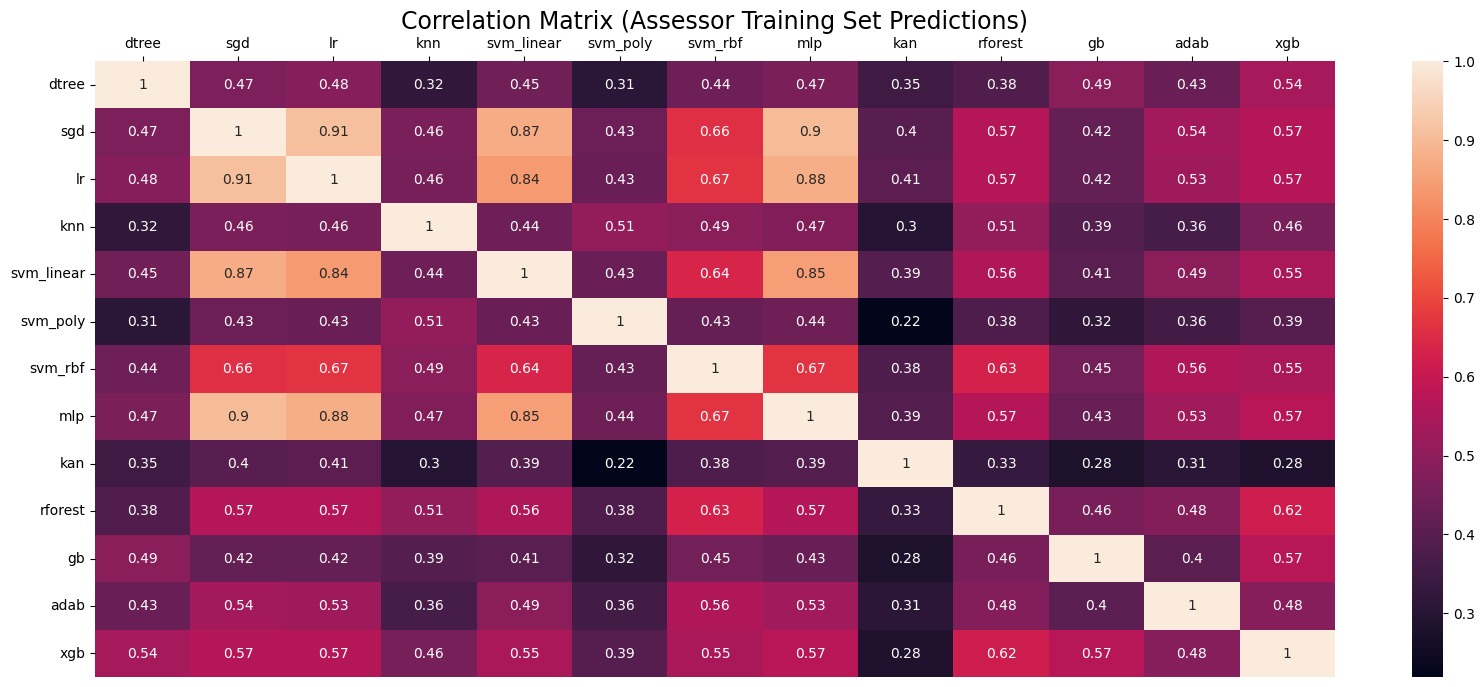

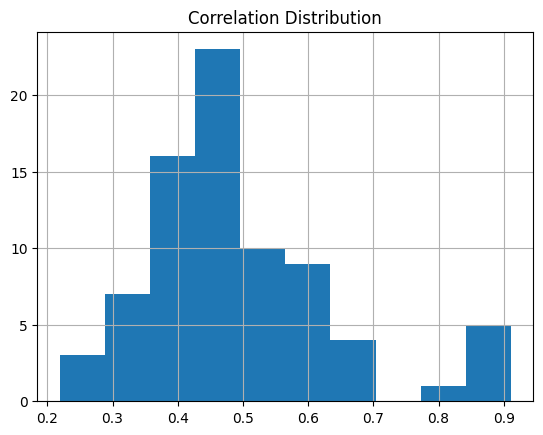

Training correlation distribution:
count    78.000000
mean      0.491471
std       0.146717
min       0.219316
25%       0.398116
50%       0.459746
75%       0.560316
max       0.910875
Name: corr, dtype: float64
[Saved image "cm_atrain.eps"]
[Saved image "cd_atrain.eps"]


In [10]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Training')

In [11]:
MIN_SCORE = 0.645 #corrls_values['corr'].quantile(0.75)

print('Min_score:', MIN_SCORE)

groups['true_assessor_train'] = group_search(pred_corrls, MIN_SCORE)
groups['true_assessor_train']

Min_score: 0.645


[['kan'],
 ['rforest'],
 ['mlp', 'sgd', 'lr', 'svm_linear'],
 ['mlp', 'sgd', 'svm_rbf', 'lr'],
 ['svm_poly'],
 ['knn'],
 ['adab'],
 ['dtree'],
 ['gb'],
 ['xgb']]

Conjunto de Teste:

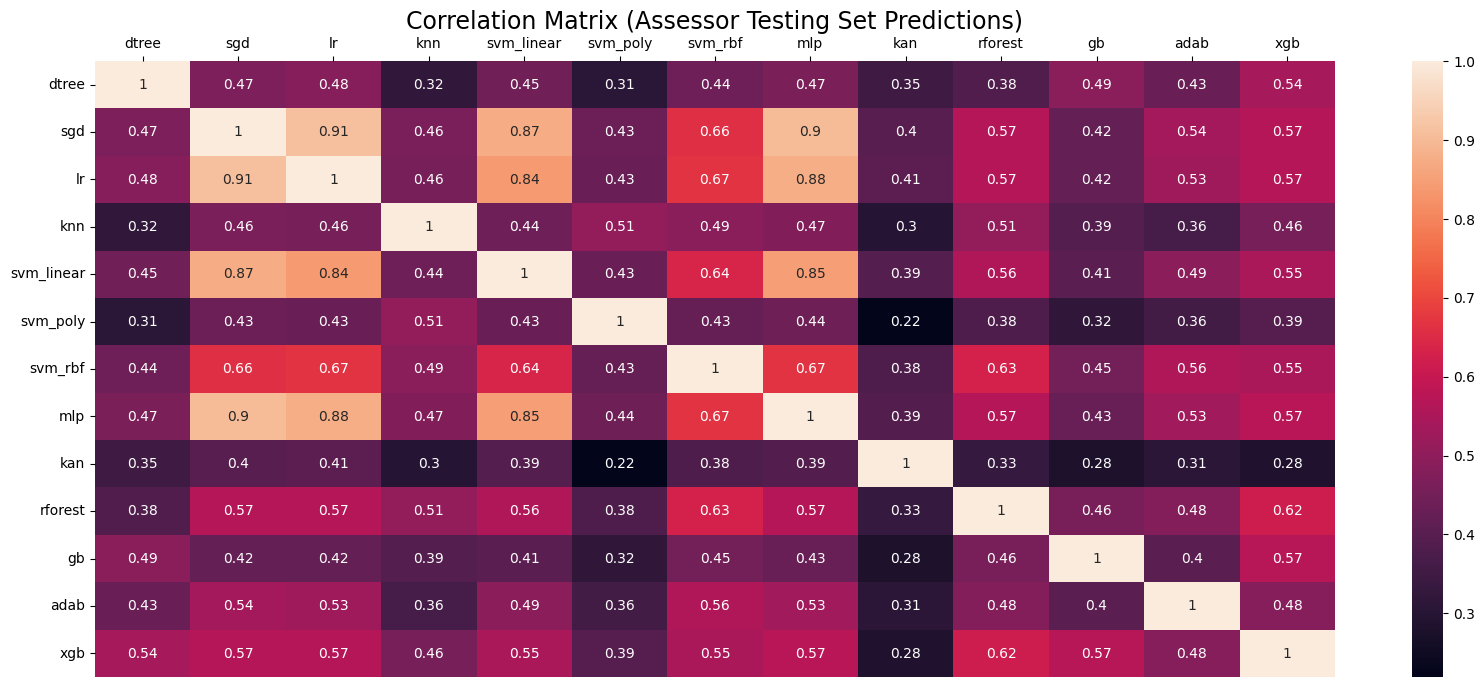

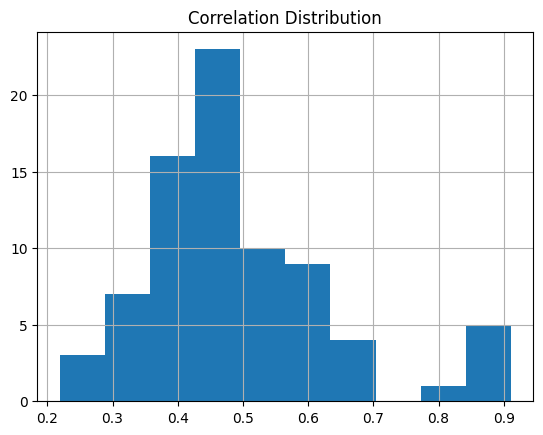

Testing correlation distribution:
count    78.000000
mean      0.491471
std       0.146717
min       0.219316
25%       0.398116
50%       0.459746
75%       0.560316
max       0.910875
Name: corr, dtype: float64
[Saved image "cm_atest.eps"]
[Saved image "cd_atest.eps"]


In [12]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Testing')

In [13]:
groups['true_assessor_test'] = group_search(pred_corrls2, MIN_SCORE)
groups['true_assessor_test']

[['kan'],
 ['rforest'],
 ['mlp', 'sgd', 'lr', 'svm_linear'],
 ['mlp', 'sgd', 'svm_rbf', 'lr'],
 ['svm_poly'],
 ['knn'],
 ['adab'],
 ['dtree'],
 ['gb'],
 ['xgb']]

Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  0.0018
NMSE: 0.0607
MAE:  0.0319
NMAE: 0.2867
aRRMSE: 0.2357
aCC:  0.9821


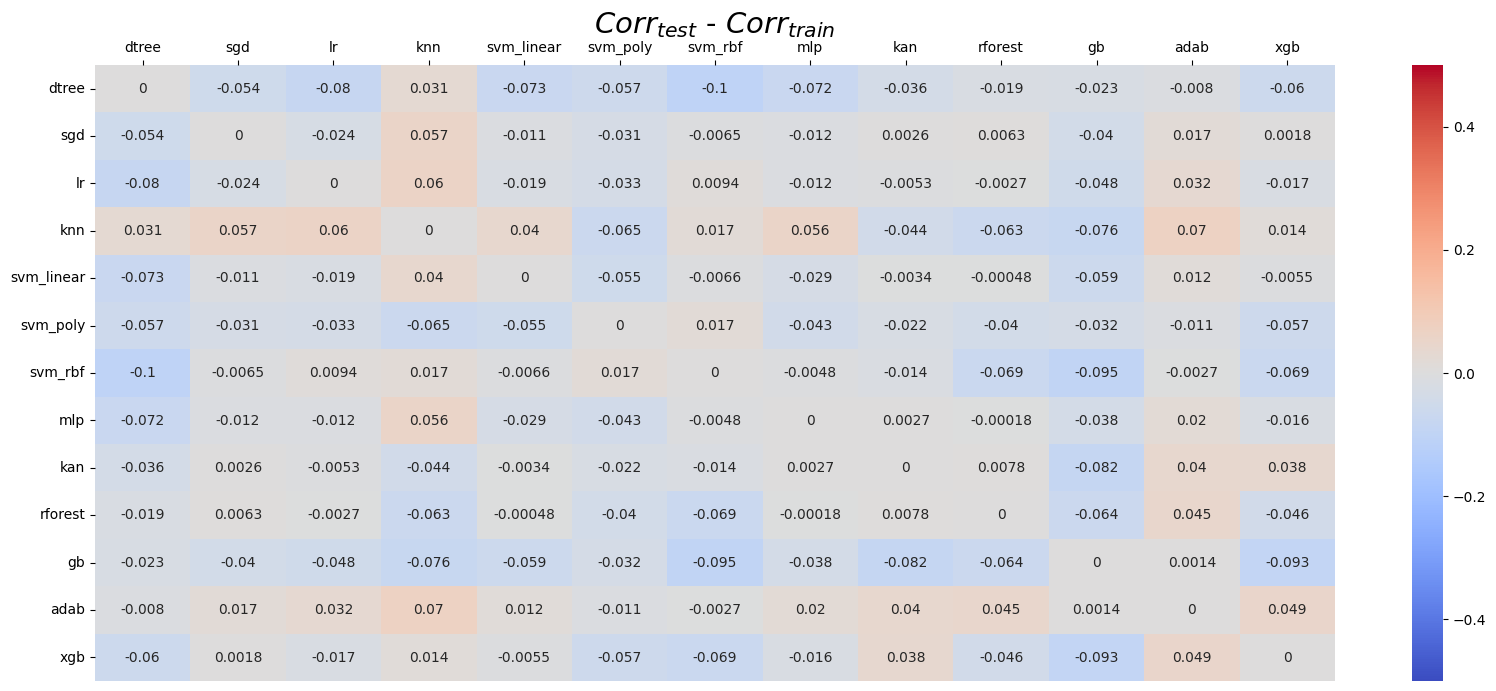

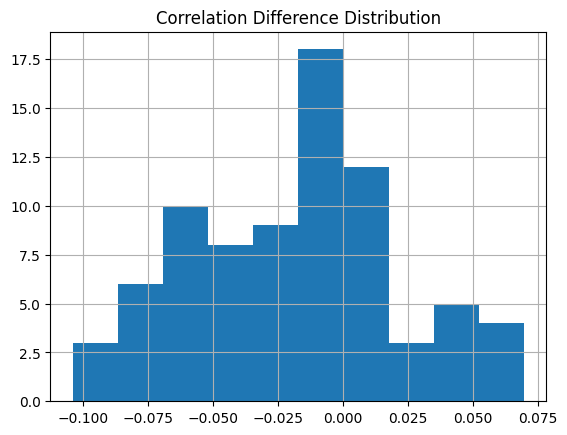

[Saved image "cmd_base.eps"]
[Saved image "cdd_base.eps"]


In [14]:
diff_corrls = pred_corrls2-pred_corrls
diff_corrls_values = corrlArray(diff_corrls)['corr']

print(f'''Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  {mse(pred_corrls, pred_corrls2):.4f}
NMSE: {nmse(pred_corrls, pred_corrls2):.4f}
MAE:  {mae(pred_corrls, pred_corrls2):.4f}
NMAE: {nmae(pred_corrls, pred_corrls2):.4f}
aRRMSE: {rrmse(pred_corrls, pred_corrls2):.4f}
aCC:  {corrCoeff(pred_corrls, pred_corrls2):.4f}''')

plt.figure(figsize=(20,8))
plt.title(r'$Corr_{test}$ - $Corr_{train}$', fontsize=21)
hm = sns.heatmap(diff_corrls, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
hm.xaxis.tick_top()
plt.show(hm)

plt.title('Correlation Difference Distribution')
hg = diff_corrls_values.hist()
plt.show(hg)

save2figs(hm, hg, DIR)

## Globais

In [15]:
parameters = {'max_depth':[None,10,20,30],
                    'criterion':['squared_error', 'poisson', 'friedman_mse'],
                    'min_samples_split':[2,5,10,20,40,60],
                    'min_samples_leaf':[1,2,10,30],
                    'n_estimators':[20,50,100,150]}

In [16]:
# Criando o MultiIndex
idx_tups = list(product(['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'], model_names))
multi_index = pd.MultiIndex.from_tuples(idx_tups, names=['Assessor', 'Model'])

metrics_df = pd.DataFrame(columns=['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC'], index=multi_index)
diff_metrics = pd.DataFrame(columns=['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC'], index=['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'])

### Regressor Chain
(RC)

In [17]:
#study = OptunaStudy(Xa_train, ya_train, 30, seed)
#
#study.search(RegressorChain, cv=5)
#
#rc_params = study.best_params
#regchain = RegressorChain(RandomForestRegressor(random_state=seed).set_params(**rc_params),
#                          random_state=seed, cv=5, verbose=True).fit(Xa_train, ya_train)

In [18]:
regchain = RegressorChain(RandomForestRegressor(random_state=seed), random_state=seed, cv=5,
                          verbose=True).fit(Xa_train, ya_train)

[Chain] .................. (1 of 13) Processing order 0, total=   0.2s
[Chain] .................. (2 of 13) Processing order 1, total=   0.2s
[Chain] .................. (3 of 13) Processing order 2, total=   0.2s
[Chain] .................. (4 of 13) Processing order 3, total=   0.2s
[Chain] .................. (5 of 13) Processing order 4, total=   0.2s
[Chain] .................. (6 of 13) Processing order 5, total=   0.2s
[Chain] .................. (7 of 13) Processing order 6, total=   0.2s
[Chain] .................. (8 of 13) Processing order 7, total=   0.2s
[Chain] .................. (9 of 13) Processing order 8, total=   0.3s
[Chain] ................. (10 of 13) Processing order 9, total=   0.3s
[Chain] ................ (11 of 13) Processing order 10, total=   0.3s
[Chain] ................ (12 of 13) Processing order 11, total=   0.4s
[Chain] ................ (13 of 13) Processing order 12, total=   0.3s


In [19]:
metrics_df.loc['RC',:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)

metrics_df.loc['RC',:]

[TRAINING SET]
MSE: 0.0211
NMSE: 0.4082
MAE: 0.1024
NMAE: 0.5875
aRRMSE: 0.6269
aCC: 0.8103

[TESTING SET]
MSE: 0.0400
NMSE: 0.8678
MAE: 0.1501
NMAE: 0.8978
aRRMSE: 0.9307
aCC: 0.3711


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                                 
dtree       0.066898  0.850712  0.213765  0.894977  0.922341  0.412323
sgd         0.035364  0.782579  0.151519  0.841436  0.884635   0.46691
lr          0.010371  0.774216  0.080874  0.852474  0.879895  0.478317
knn         0.031528  0.849972  0.144959  0.882331  0.921939  0.392574
svm_linear  0.026537  0.816617  0.131263  0.872729  0.903668  0.429634
svm_poly    0.026181   0.83639  0.125199  0.902992  0.914544    0.4127
svm_rbf      0.00618  0.863433  0.064815  0.883418  0.929211  0.378612
mlp         0.038887    0.7984  0.160568  0.850094  0.893532  0.450541
kan         0.117636  1.007732  0.291882  0.985802  1.003859  0.125334
rforest     0.036326  0.892642  0.154133  0.921418  0.944797  0.341729
gb          0.085803  1.032201  0.247526  0.981777  1.015973  0.229602
adab        0.001499  0.920272  0.026345  0.895008  0.959308  0.318753
xgb         0.037363  0.856784  0.158616  0.907345  0.925626   0.38702

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

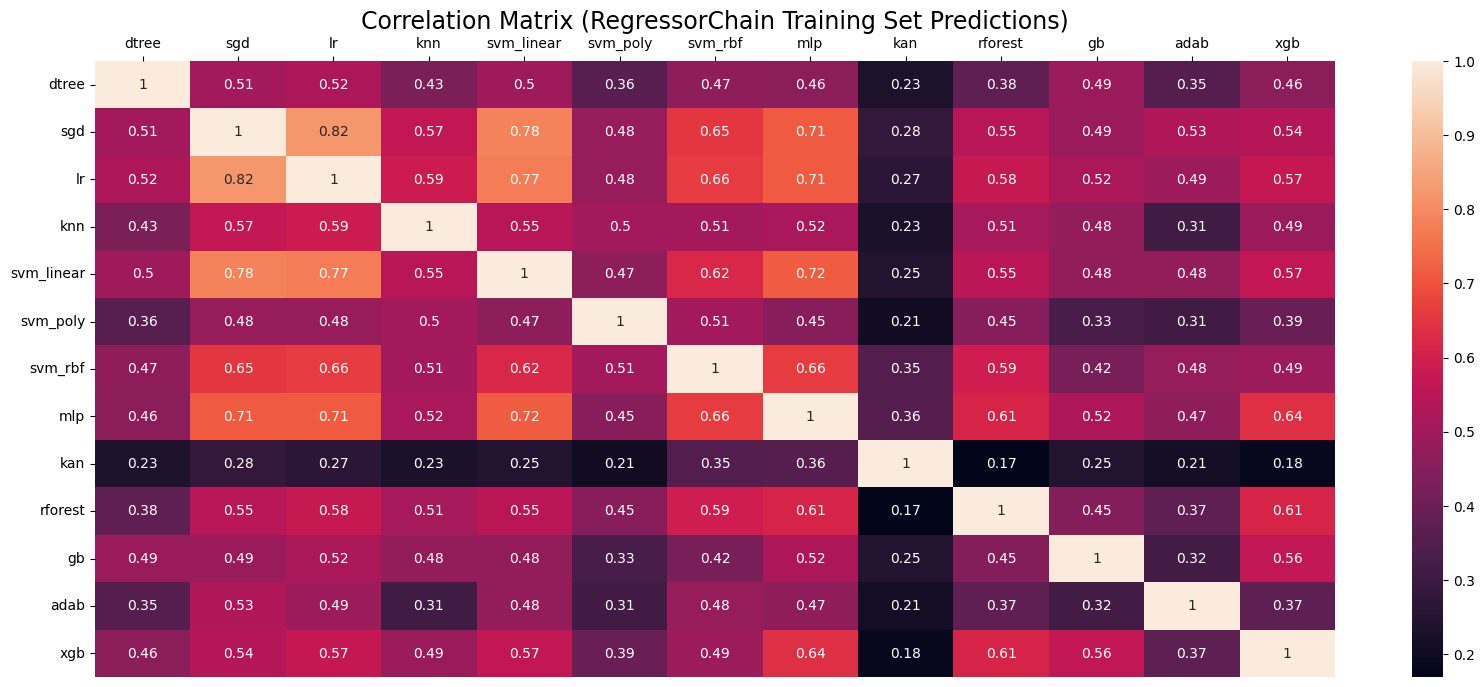

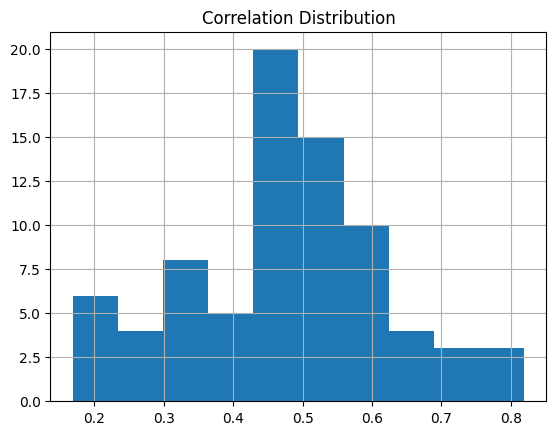

Training correlation distribution:
count    78.000000
mean      0.476596
std       0.143813
min       0.169322
25%       0.374828
50%       0.488869
75%       0.560669
max       0.818761
Name: corr, dtype: float64


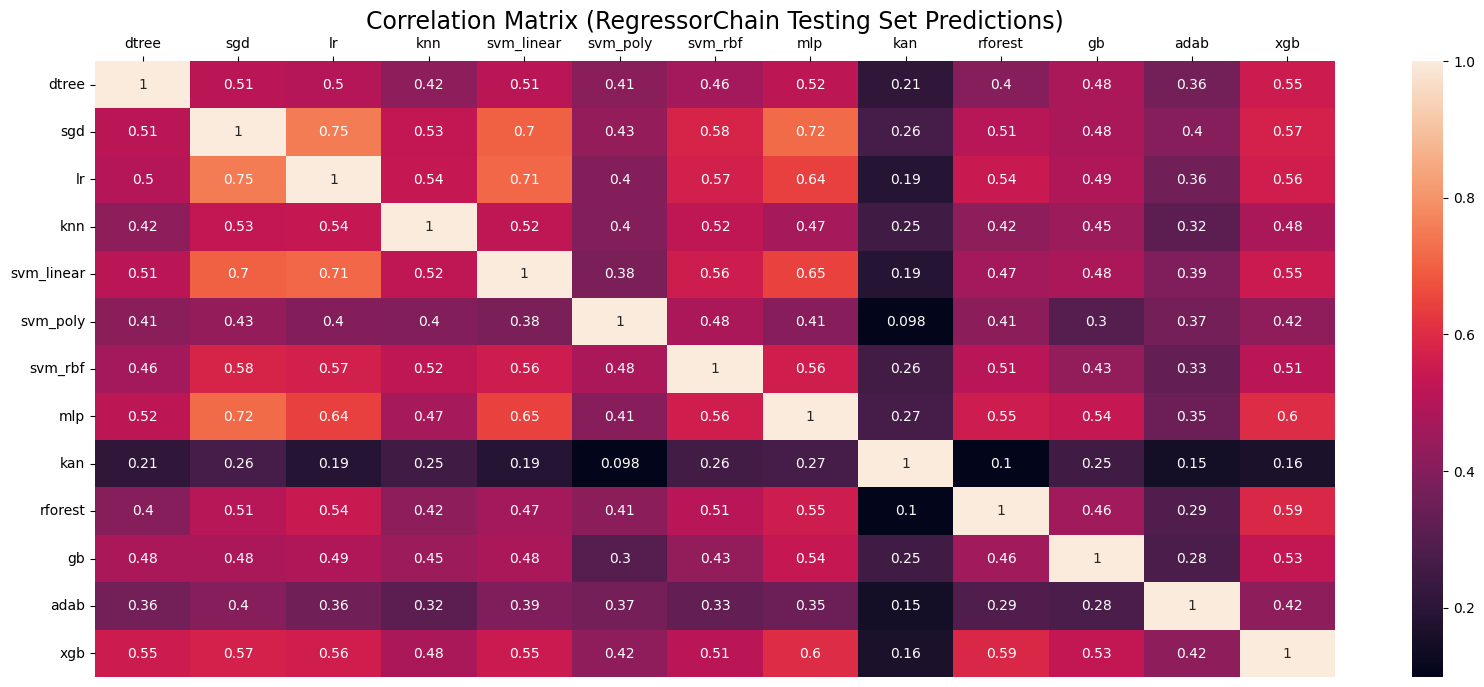

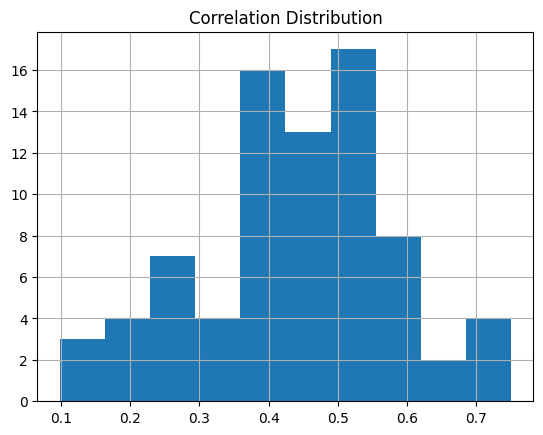

Testing correlation distribution:
count    78.000000
mean      0.441031
std       0.142616
min       0.098388
25%       0.364790
50%       0.464763
75%       0.536176
max       0.750357
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0117
NMSE: 0.0843
MAE: 0.3507
NMAE: 0.6803
aRRMSE: 0.5692
aCC: 0.8951


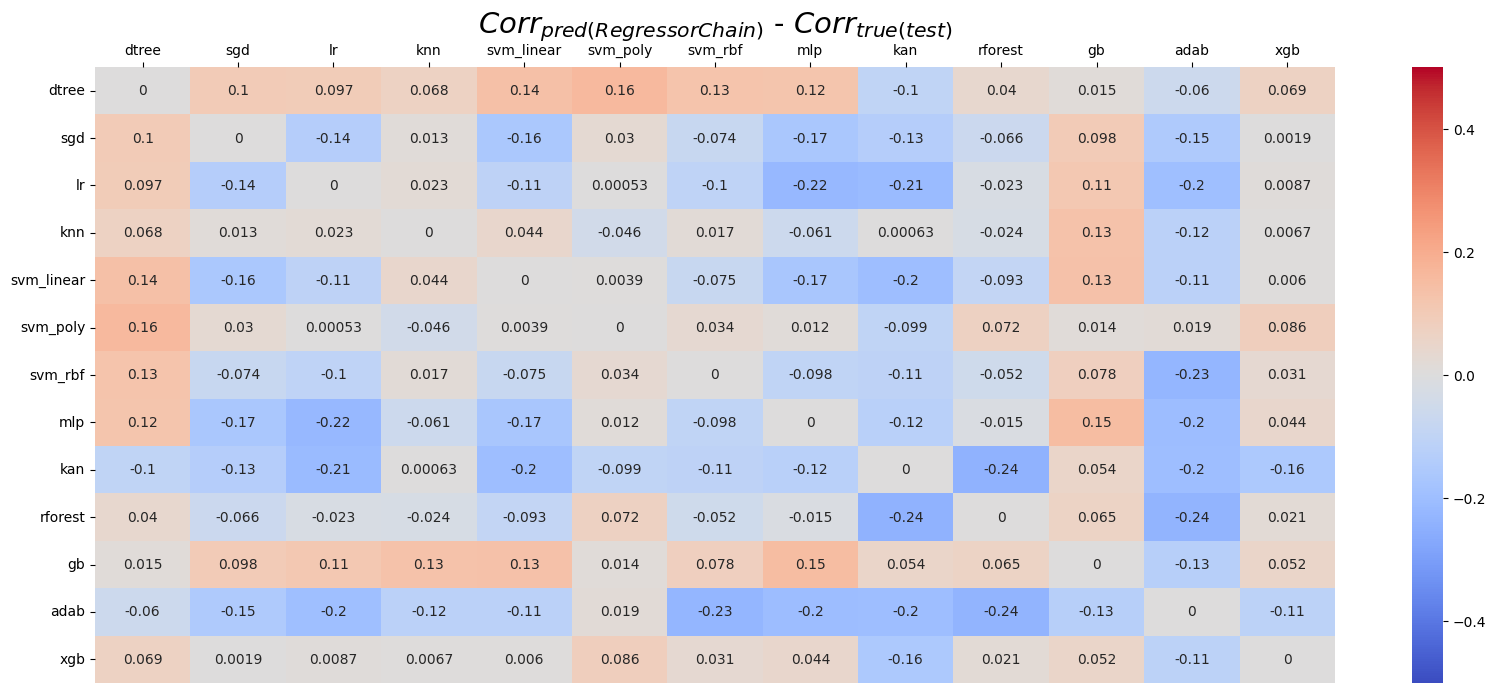

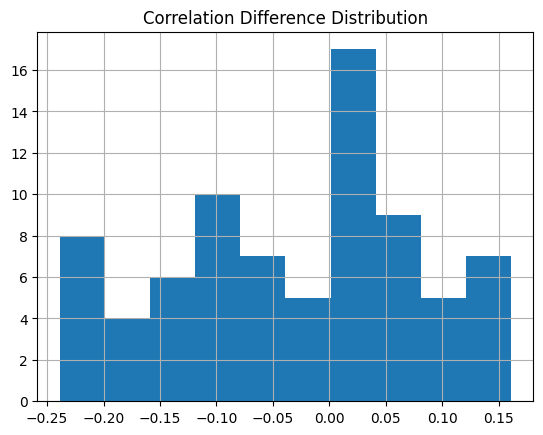

In [20]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(regchain, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name="RegressorChain",
                                       show_plot=True, save_plot=None)

In [21]:
diff_metrics.loc['RC',:] = results['results']
diff_metrics.loc['RC',:]

MSE       0.011668
MAE        0.08431
NMSE      0.350662
NMAE      0.680314
aRRMSE    0.569228
aCC       0.895119
Name: RC, dtype: object

In [22]:
groups['regchain_assessor'] = results['groups']
groups['regchain_assessor']['test']

[['kan'],
 ['rforest'],
 ['sgd', 'svm_linear', 'mlp'],
 ['sgd', 'svm_linear', 'lr'],
 ['svm_rbf'],
 ['svm_poly'],
 ['knn'],
 ['adab'],
 ['dtree'],
 ['gb'],
 ['xgb']]

### Multi-Output Random Forest Regressor 

In [23]:
mrf = RandomForestRegressor(random_state=seed).fit(Xa_train, ya_train)

In [24]:
metrics_df.loc['MRT',:] = assr_performance(mrf, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0062
NMSE: 0.1261
MAE: 0.0583
NMAE: 0.3385
aRRMSE: 0.3550
aCC: 0.9803

[TESTING SET]
MSE: 0.0387
NMSE: 0.8257
MAE: 0.1481
NMAE: 0.8830
aRRMSE: 0.9077
aCC: 0.4294


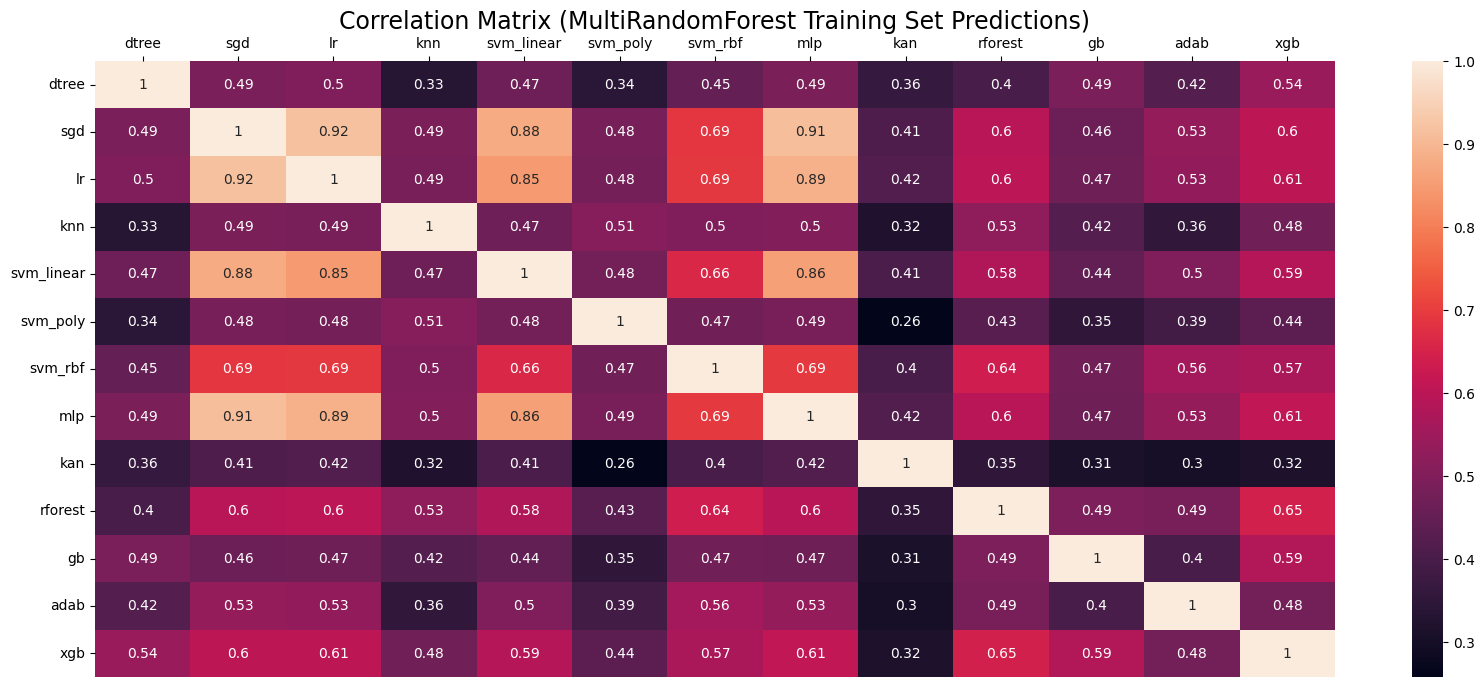

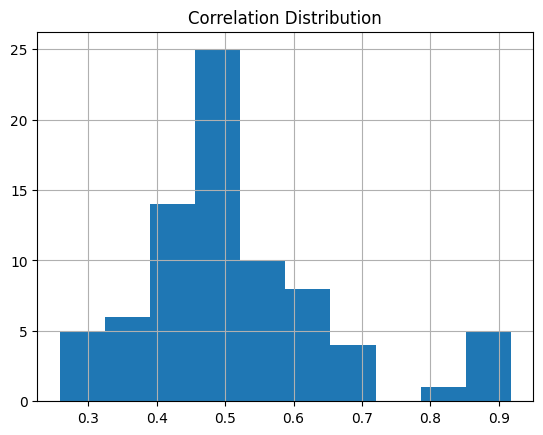

Training correlation distribution:
count    78.000000
mean      0.513167
std       0.143692
min       0.258368
25%       0.421716
50%       0.485992
75%       0.583677
max       0.917483
Name: corr, dtype: float64


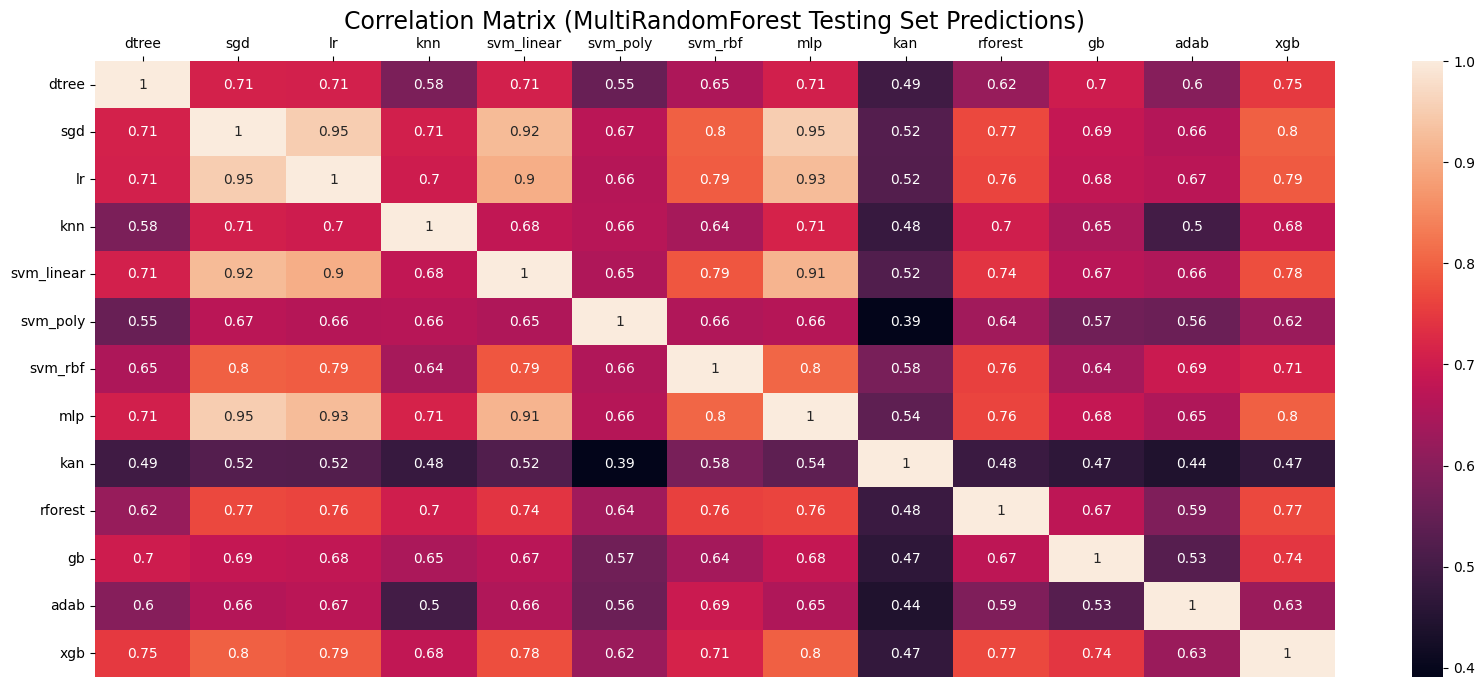

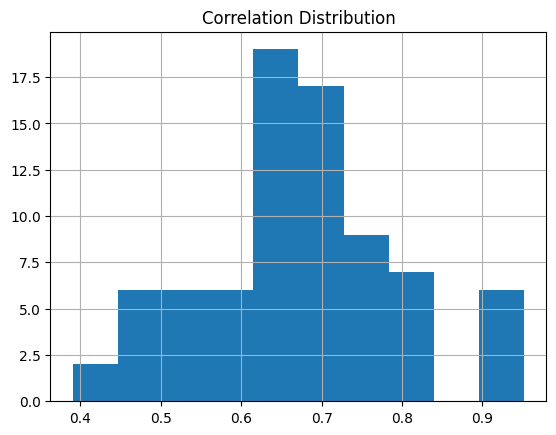

Testing correlation distribution:
count    78.000000
mean      0.673855
std       0.120333
min       0.390854
25%       0.602591
50%       0.672112
75%       0.748374
max       0.951573
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0426
NMSE: 0.1850
MAE: 1.3085
NMAE: 1.5559
aRRMSE: 1.1178
aCC: 0.9269


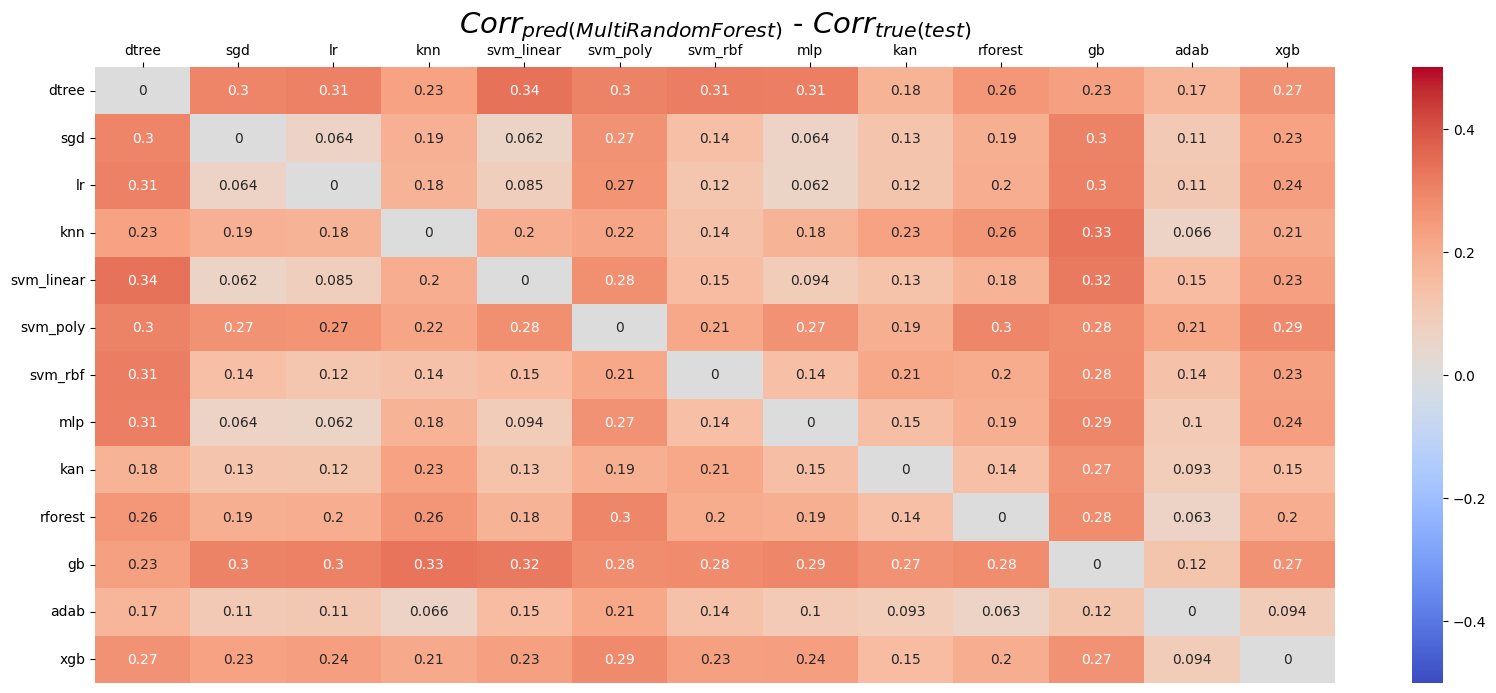

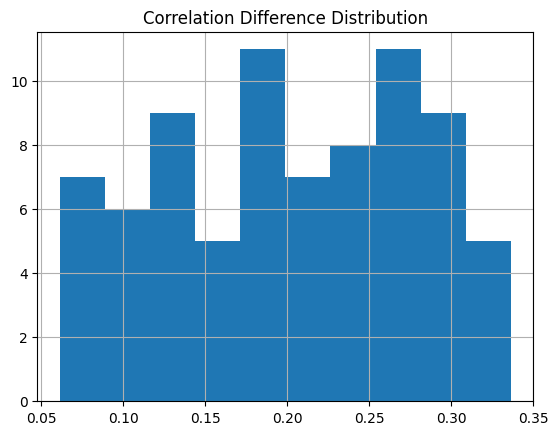

In [25]:
results = correlation_pred_performance(mrf, Xa_test, ya_test, Xa_train, 
                                       MIN_SCORE, name="MultiRandomForest")

In [26]:
diff_metrics.loc['MRT',:] = results['results']
diff_metrics.loc['MRT',:]

MSE       0.042634
MAE       0.185016
NMSE      1.308456
NMAE      1.555901
aRRMSE    1.117812
aCC       0.926861
Name: MRT, dtype: object

In [27]:
groups['mrf_assessor'] = results['groups']
groups['mrf_assessor']['test']

[['kan'],
 ['mlp', 'sgd', 'svm_linear', 'lr', 'dtree', 'gb', 'xgb'],
 ['rforest', 'mlp', 'svm_linear', 'sgd', 'knn', 'lr', 'gb', 'xgb'],
 ['mlp', 'svm_linear', 'sgd', 'svm_rbf', 'lr', 'adab'],
 ['mlp', 'svm_linear', 'sgd', 'svm_rbf', 'svm_poly', 'lr'],
 ['mlp', 'sgd', 'svm_linear', 'svm_rbf', 'lr', 'dtree', 'xgb'],
 ['rforest', 'mlp', 'svm_linear', 'sgd', 'svm_rbf', 'lr', 'xgb'],
 ['mlp', 'svm_linear', 'sgd', 'svm_poly', 'knn', 'lr']]

### Multi-Output SVR

In [28]:
#msvr = MSVR()
#msvr.fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#msvr_params = product(svm_rbf_params)
#g_search = GridSearchCV(MSVR(), svm_rbf_params, scoring='neg_mean_squared_error', n_jobs=-1).fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#print(g_search.best_params_)
#msvr = g_search.best_estimator_

In [29]:
#study_norm = OptunaStudy(Xa_train_norm, ya_train.values, 200)
#study_norm.search(MSVR)

In [30]:
msvr = MSVR().fit(Xa_train_norm, ya_train.values)

In [31]:
metrics_df.loc['M-SVR',:] = assr_performance(msvr, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

[TRAINING SET]
MSE: 0.0209
NMSE: 0.5416
MAE: 0.1093
NMAE: 0.7021
aRRMSE: 0.7122
aCC: 0.7675

[TESTING SET]
MSE: 0.0452
NMSE: 1.4988
MAE: 0.1571
NMAE: 1.0558
aRRMSE: 1.1532
aCC: 0.3294


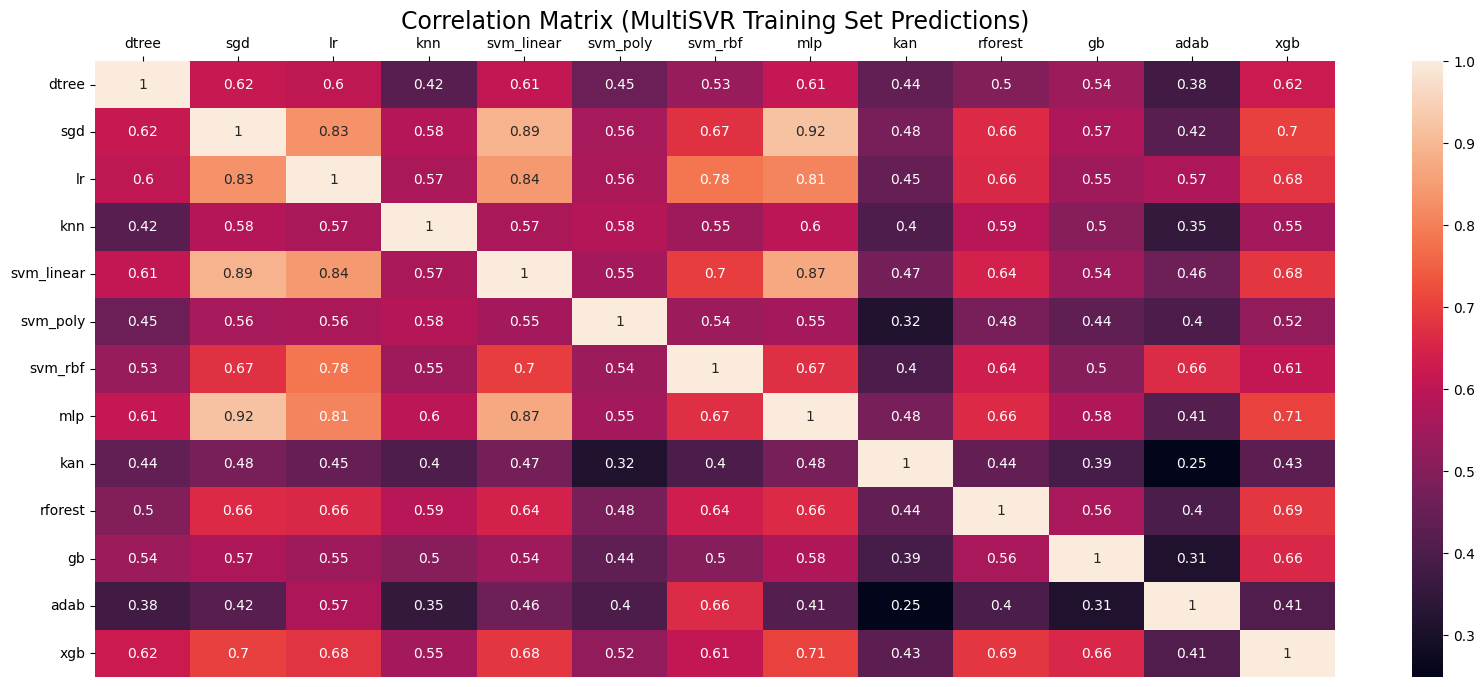

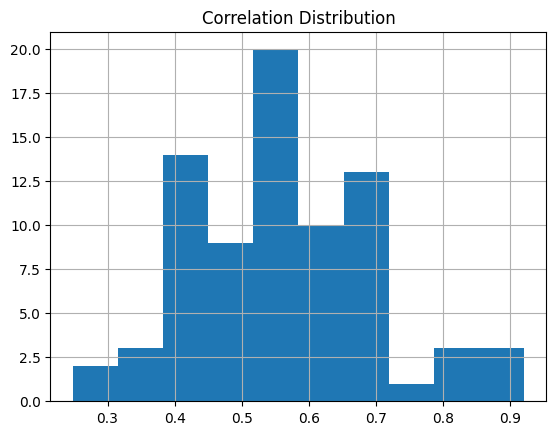

Training correlation distribution:
count    78.000000
mean      0.561379
std       0.137547
min       0.248535
25%       0.456067
50%       0.560118
75%       0.652684
max       0.920629
Name: corr, dtype: float64


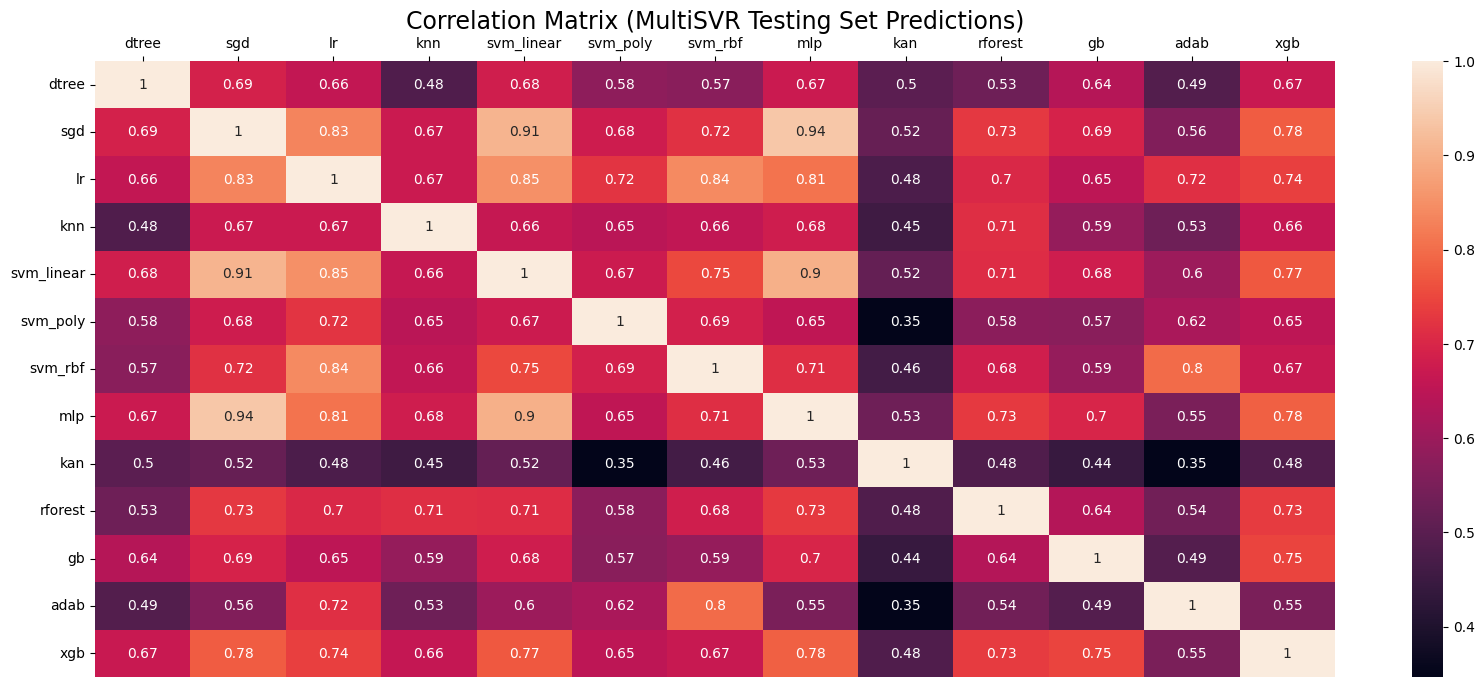

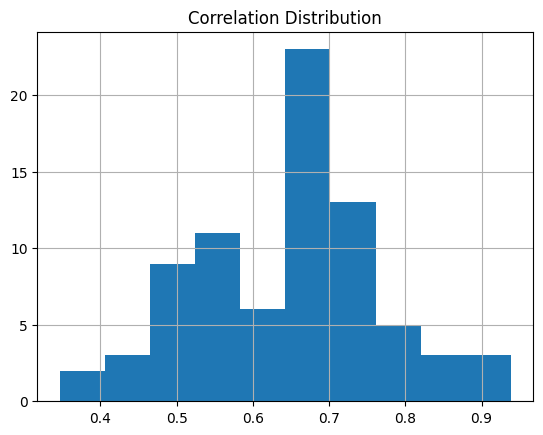

Testing correlation distribution:
count    78.000000
mean      0.645174
std       0.121801
min       0.346762
25%       0.552657
50%       0.665927
75%       0.715173
max       0.938356
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0356
NMSE: 0.1612
MAE: 1.0840
NMAE: 1.3560
aRRMSE: 1.0168
aCC: 0.8861


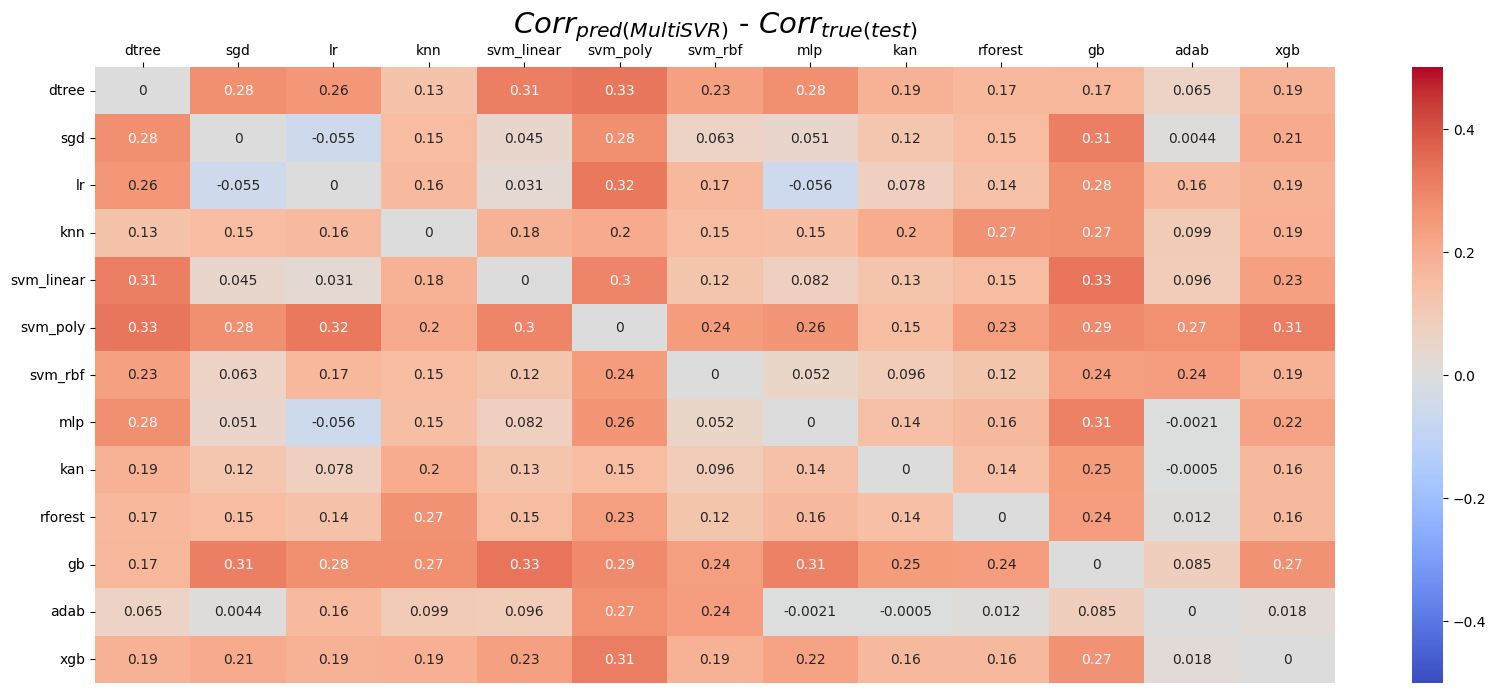

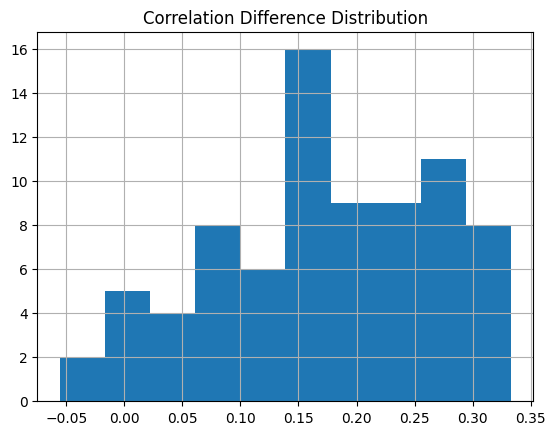

In [32]:
results = correlation_pred_performance(msvr, 
                                       pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test,
                                       pd.DataFrame(Xa_train_norm, index=Xa_train.index), 
                                       MIN_SCORE, name="MultiSVR")

In [33]:
diff_metrics.loc['M-SVR',:] = results['results']
diff_metrics.loc['M-SVR',:]

MSE       0.035598
MAE       0.161212
NMSE      1.083956
NMAE      1.356016
aRRMSE    1.016842
aCC       0.886117
Name: M-SVR, dtype: object

In [34]:
groups['msvr_assessor'] = results['groups']
groups['msvr_assessor']['test']

[['kan'],
 ['mlp', 'svm_linear', 'sgd', 'lr', 'dtree', 'xgb'],
 ['mlp', 'svm_linear', 'sgd', 'lr', 'gb', 'xgb'],
 ['rforest', 'mlp', 'svm_linear', 'sgd', 'svm_rbf', 'knn', 'lr', 'xgb'],
 ['mlp', 'svm_linear', 'sgd', 'svm_rbf', 'svm_poly', 'knn', 'lr', 'xgb'],
 ['svm_rbf', 'lr', 'adab']]

### Multi-Output Regressor 
(ST)

In [35]:
#mtr_params = getAssrParams(RandomForestRegressor, parameters, seed, False, 'estimator')
#
##mor = MultiOutputRegressor(RandomForestRegressor(random_state=seed), n_jobs=-1).fit(Xa_train, ya_train)
#g_search = GridSearchCV(MultiOutputRegressor(RandomForestRegressor()), mtr_params, n_jobs=-1, verbose=True, scoring="neg_mean_absolute_error").fit(Xa_train, ya_train)
#print(g_search.best_params_)
#mor = g_search.best_estimator_

In [36]:
#study = OptunaStudy(Xa_train, ya_train, 100)
#study.search(MultiOutputRegressor)

In [37]:
single_tgt = MultiOutputRegressor(RandomForestRegressor(random_state=seed), 
                                  n_jobs=-1).fit(Xa_train, ya_train)

In [38]:
metrics_df.loc['ST',:] = assr_performance(single_tgt, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0062
NMSE: 0.1267
MAE: 0.0578
NMAE: 0.3359
aRRMSE: 0.3558
aCC: 0.9768

[TESTING SET]
MSE: 0.0393
NMSE: 0.8489
MAE: 0.1488
NMAE: 0.8894
aRRMSE: 0.9204
aCC: 0.3961


#### Análise das correlações

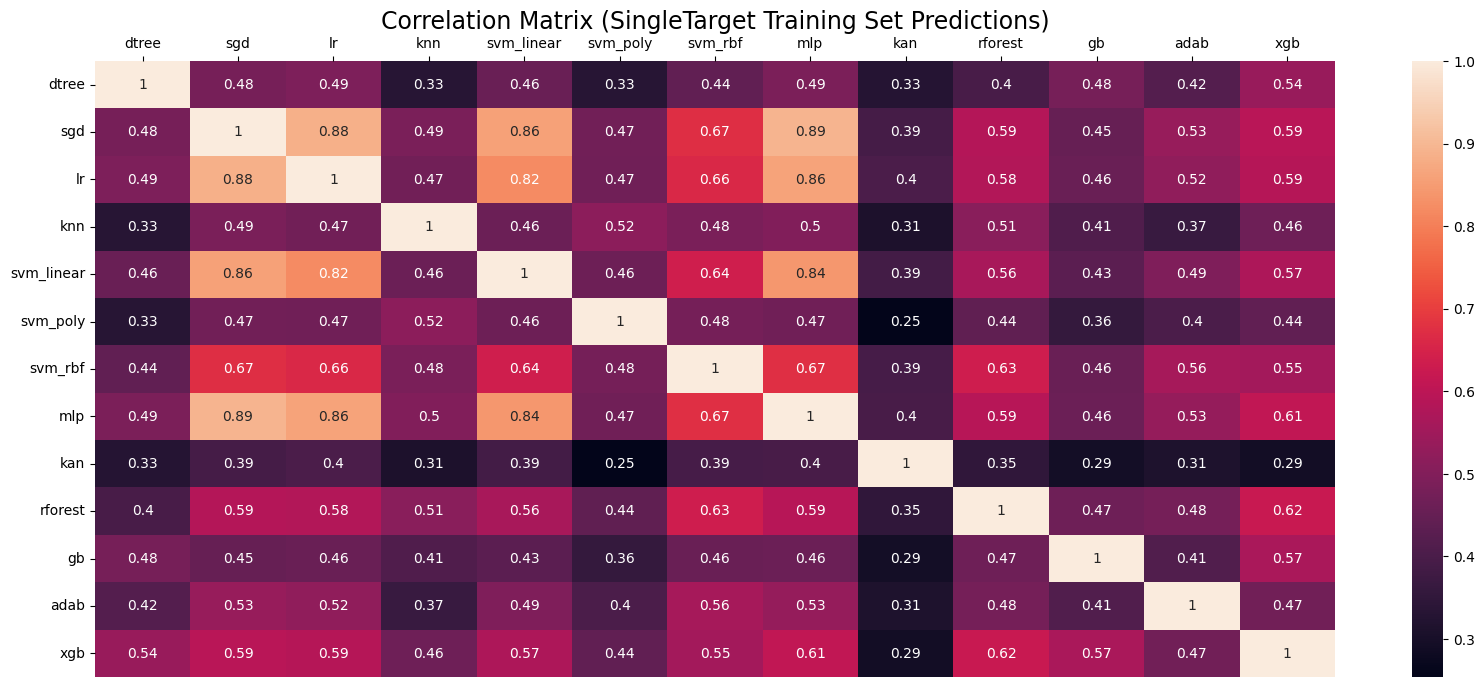

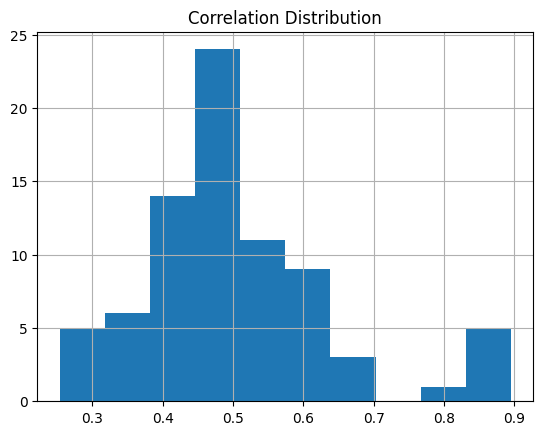

Training correlation distribution:
count    78.000000
mean      0.502668
std       0.139472
min       0.253963
25%       0.414533
50%       0.474376
75%       0.566942
max       0.894828
Name: corr, dtype: float64


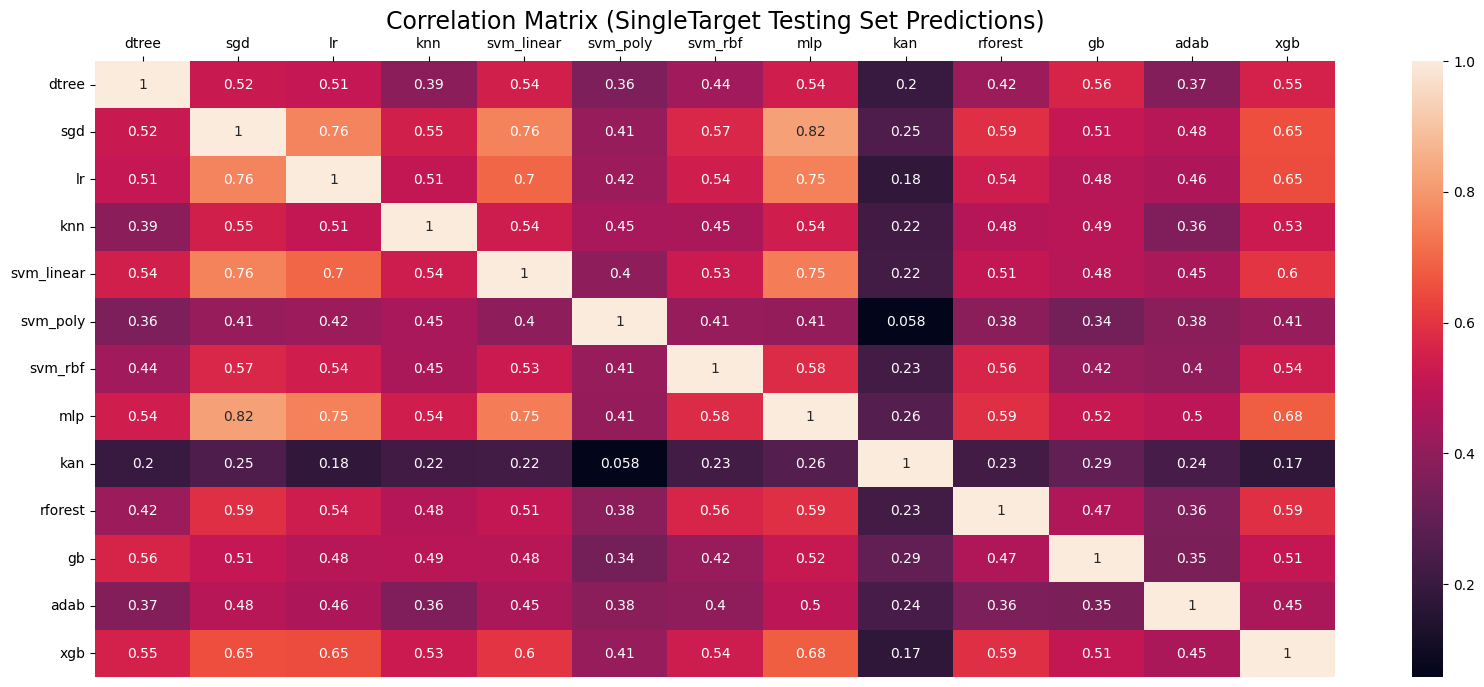

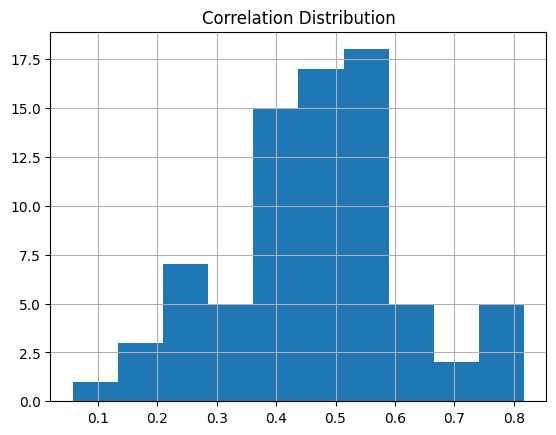

Testing correlation distribution:
count    78.000000
mean      0.465743
std       0.149846
min       0.058102
25%       0.385847
50%       0.482316
75%       0.543933
max       0.817076
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0084
NMSE: 0.0755
MAE: 0.2473
NMAE: 0.6156
aRRMSE: 0.4882
aCC: 0.9177


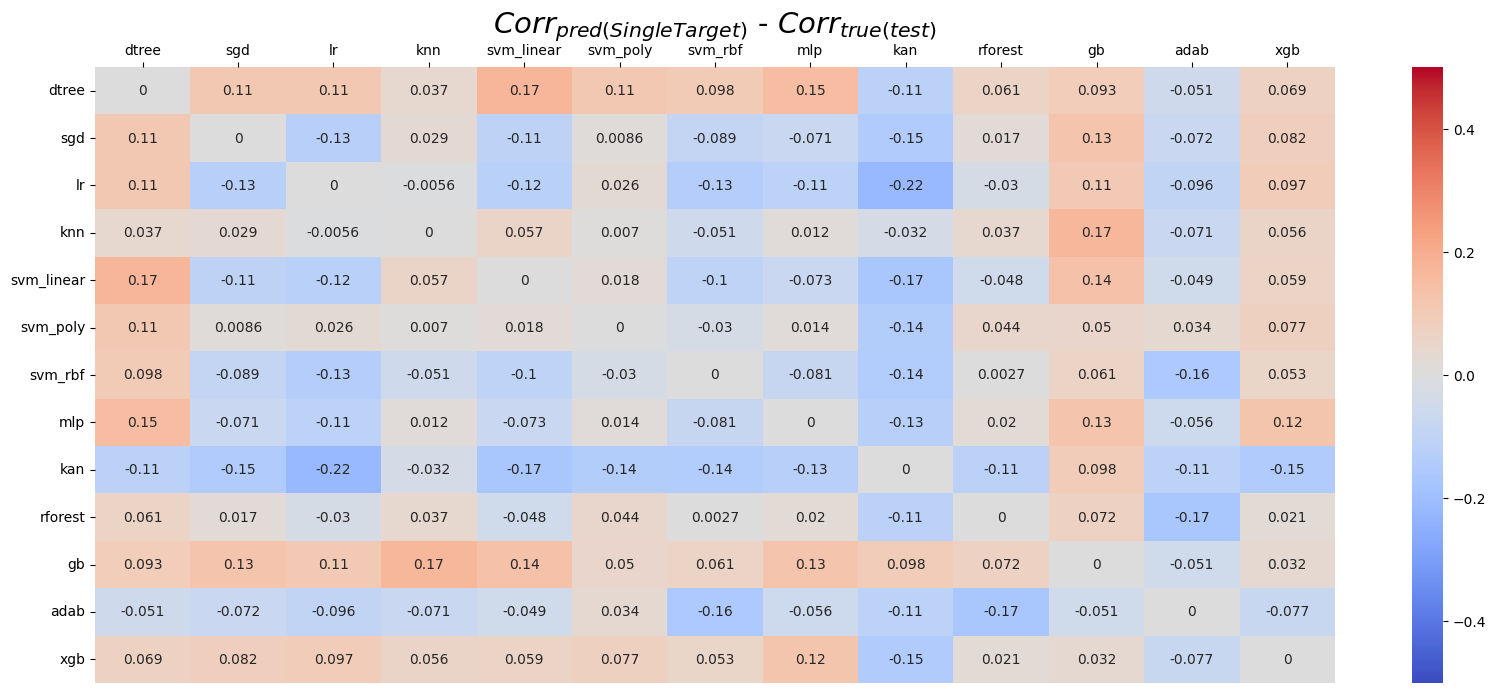

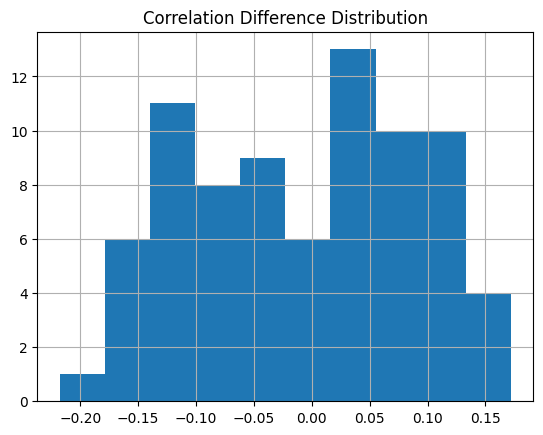

In [39]:
results = correlation_pred_performance(single_tgt, Xa_test, ya_test, Xa_train,
                                       MIN_SCORE, name="SingleTarget")

In [40]:
diff_metrics.loc['ST',:] = results['results']
diff_metrics.loc['ST',:]

MSE       0.008357
MAE       0.075489
NMSE      0.247314
NMAE      0.615568
aRRMSE    0.488187
aCC       0.917692
Name: ST, dtype: object

In [41]:
groups['st_assessor'] = results['groups']
groups['st_assessor']['test']

[['kan'],
 ['rforest'],
 ['mlp', 'sgd', 'lr', 'svm_linear'],
 ['mlp', 'sgd', 'lr', 'xgb'],
 ['svm_rbf'],
 ['svm_poly'],
 ['knn'],
 ['adab'],
 ['dtree'],
 ['gb']]

## Grupais

In [42]:
#keys = list(groups.keys())
#for i in range(len(keys)):
#    for j in range(i+1, len(keys)):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & {keys[j]}({len(groups[keys[j]])}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups[keys[j]]):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

In [43]:
for g in groups['true_assessor_train']:
    if(len(g)!=1):
        teste = []
        for i, m in enumerate(g):
            for n in g[i+1:]:
                teste.append(pred_corrls.loc[m,n])
        print(g)
        print(f'total: {np.mean(teste)}\n')

['mlp', 'sgd', 'lr', 'svm_linear']
total: 0.8741527368076042

['mlp', 'sgd', 'svm_rbf', 'lr']
total: 0.779652320183438



### Regressor Chain

In [44]:
rcg = GroupedAssessor(RegressorChain, model_names, random_state=seed)
rcg.fit(Xa_train, ya_train, groups['true_assessor_train'], base_estimator=RandomForestRegressor(random_state=seed), random_state=seed)

[TRAINING SET]
MSE: 0.0067
NMSE: 0.1478
MAE: 0.0599
NMAE: 0.3526
aRRMSE: 0.3825
aCC: 0.9674

[TESTING SET]
MSE: 0.0392
NMSE: 0.8431
MAE: 0.1488
NMAE: 0.8884
aRRMSE: 0.9171
aCC: 0.4062


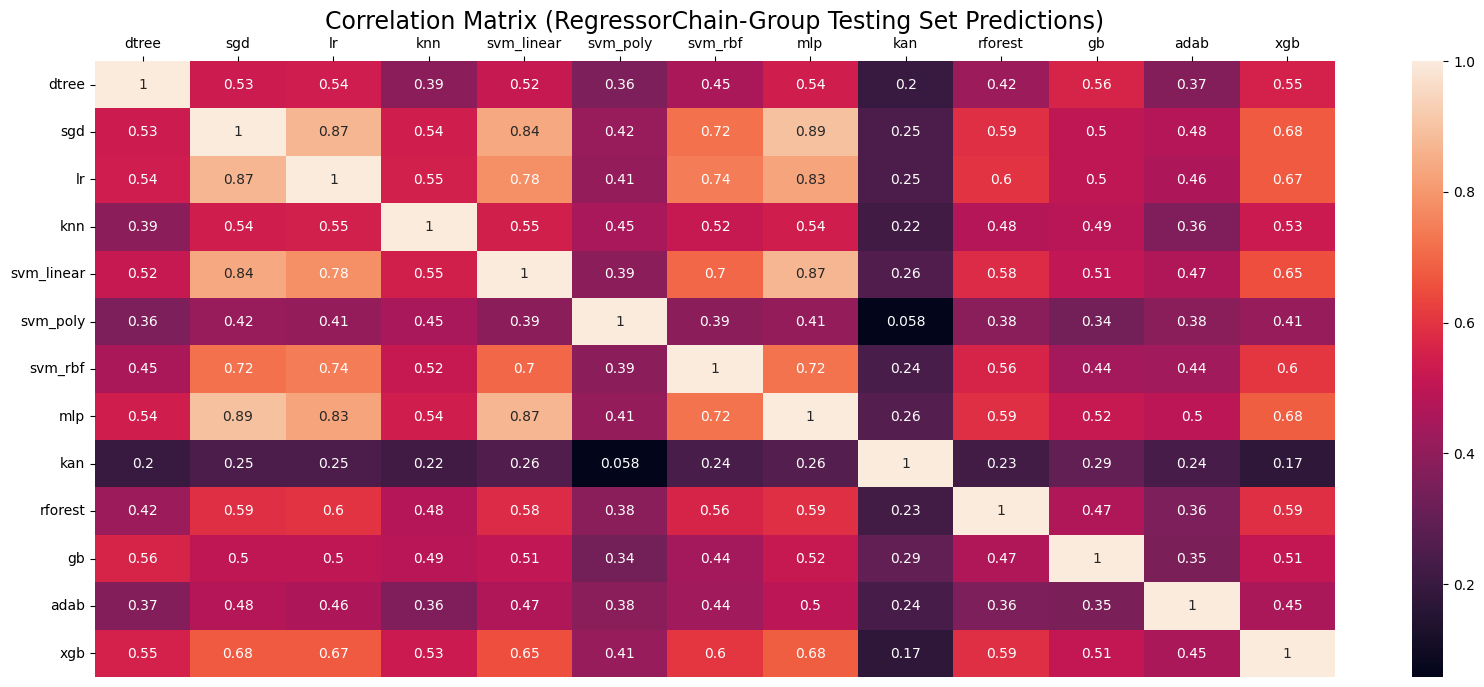

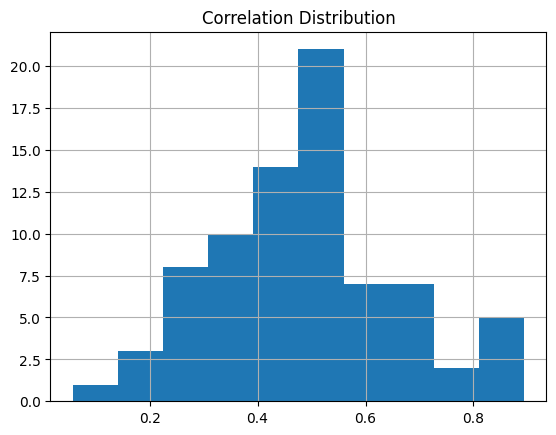

Testing correlation distribution:
count    78.000000
mean      0.489077
std       0.173385
min       0.058102
25%       0.385847
50%       0.491183
75%       0.575178
max       0.893524
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0074
NMSE: 0.0695
MAE: 0.2243
NMAE: 0.5841
aRRMSE: 0.4629
aCC: 0.9312


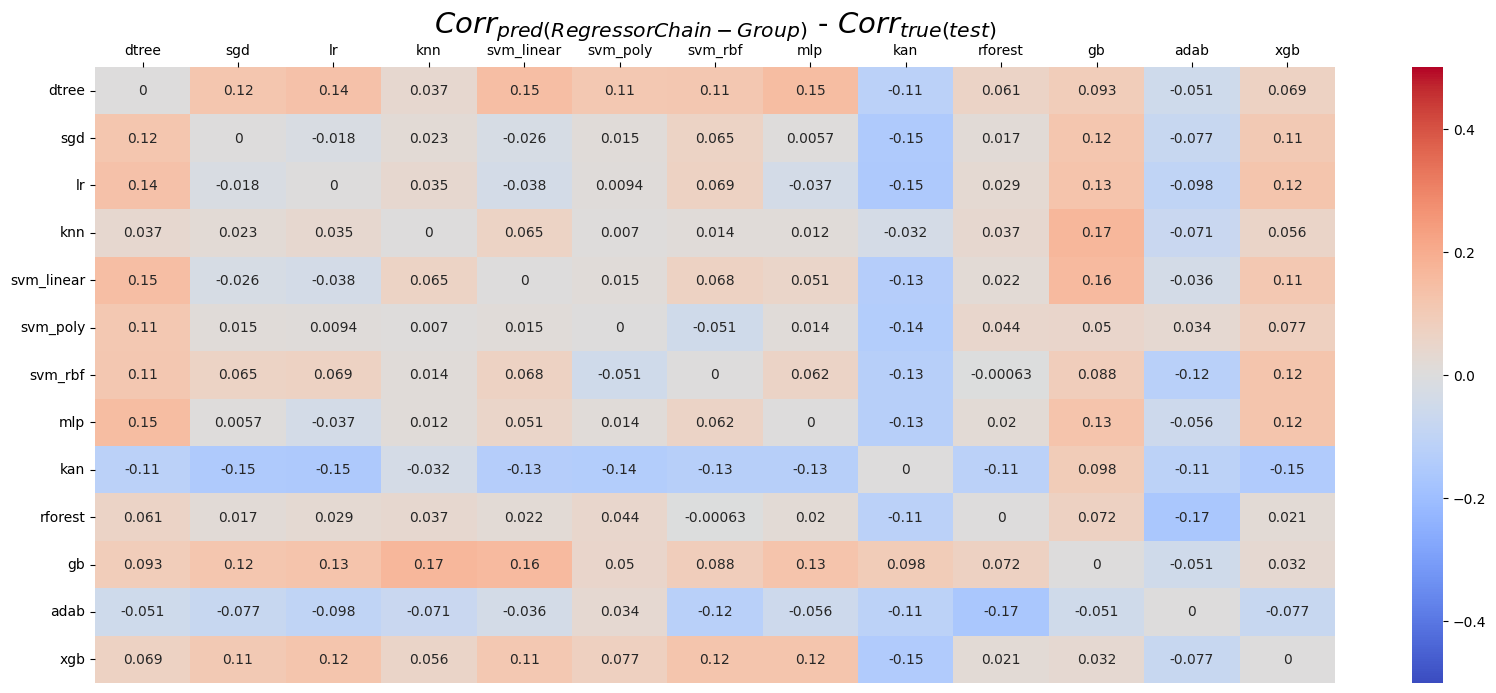

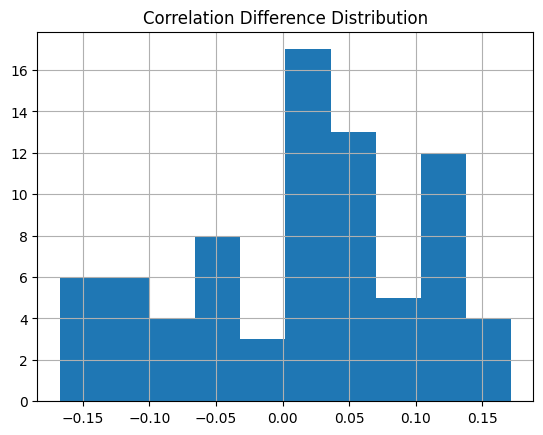

[['kan'], ['rforest'], ['mlp', 'sgd', 'svm_linear', 'svm_rbf', 'lr'], ['mlp', 'sgd', 'svm_linear', 'lr', 'xgb'], ['svm_poly'], ['knn'], ['adab'], ['dtree'], ['gb']]


In [45]:
metrics_df.loc['RC(g)',:] = assr_performance(rcg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(rcg, Xa_test, ya_test, min_score=MIN_SCORE, name="RegressorChain-Group")

diff_metrics.loc['RC(g)',:] = results['results']

groups['rcg_assessor'] = results['groups']
print(groups['rcg_assessor']['test'])

In [46]:
results

{'results': [0.007354780891932206,
  0.06953996246256043,
  0.22432263908611466,
  0.5840688754791643,
  0.4629049572976197,
  0.9312016253873738],
 'groups': {'test': [['kan'],
   ['rforest'],
   ['mlp', 'sgd', 'svm_linear', 'svm_rbf', 'lr'],
   ['mlp', 'sgd', 'svm_linear', 'lr', 'xgb'],
   ['svm_poly'],
   ['knn'],
   ['adab'],
   ['dtree'],
   ['gb']]}}

### Multi-Output SVR

In [47]:
msvrg = GroupedAssessor(MSVR, model_names, seed)

msvrg.fit(Xa_train_norm, ya_train, groups['true_assessor_train'])

c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u
c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u


[TRAINING SET]
MSE: 0.0306
NMSE: 0.7385
MAE: 0.1337
NMAE: 0.8459
aRRMSE: 0.8443
aCC: 0.6644

[TESTING SET]
MSE: 0.0492
NMSE: 1.5985
MAE: 0.1622
NMAE: 1.0933
aRRMSE: 1.2016
aCC: 0.3004


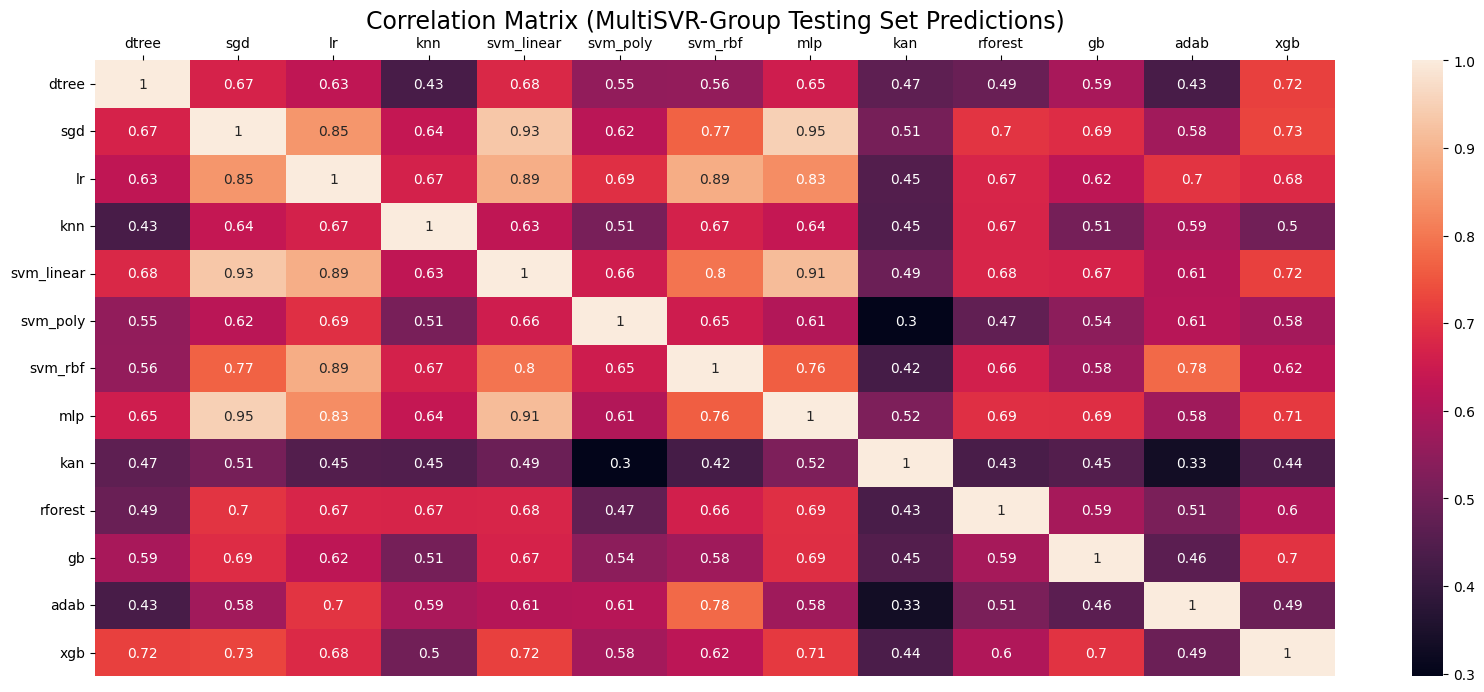

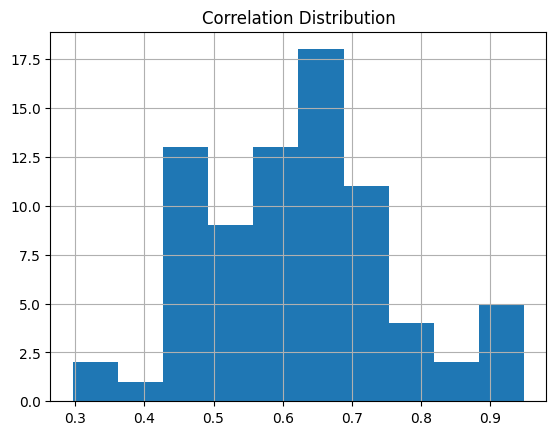

Testing correlation distribution:
count    78.000000
mean      0.620602
std       0.135604
min       0.296749
25%       0.511975
50%       0.625905
75%       0.692413
max       0.948929
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0275
NMSE: 0.1392
MAE: 0.8266
NMAE: 1.1551
aRRMSE: 0.8899
aCC: 0.8894


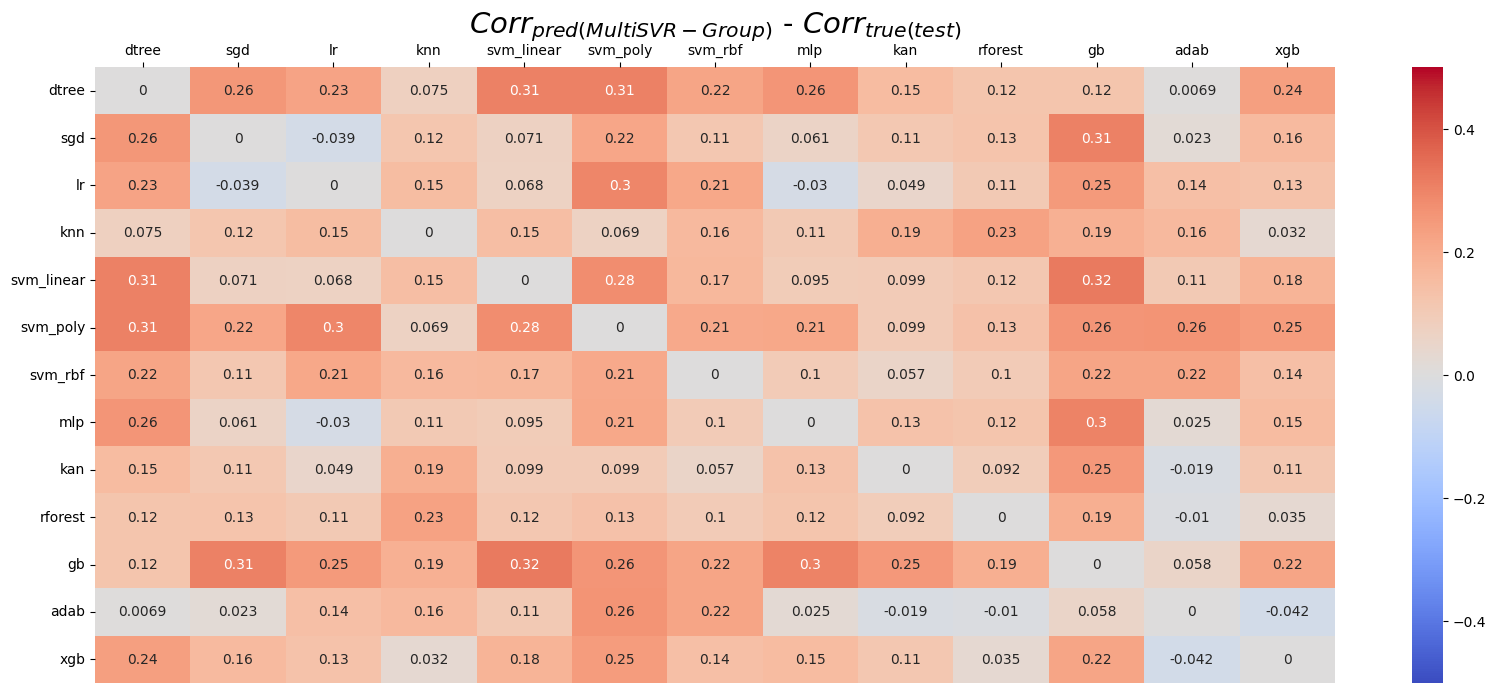

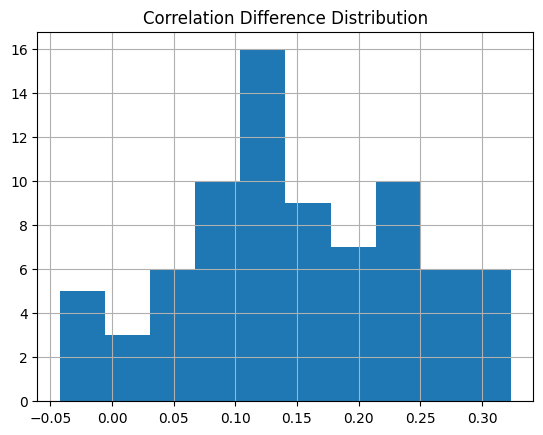

[['kan'], ['mlp', 'svm_linear', 'sgd', 'dtree', 'xgb'], ['mlp', 'svm_linear', 'sgd', 'gb', 'xgb'], ['rforest', 'mlp', 'svm_linear', 'sgd', 'svm_rbf', 'lr'], ['mlp', 'svm_linear', 'sgd', 'lr', 'xgb'], ['svm_linear', 'svm_rbf', 'lr', 'svm_poly'], ['svm_rbf', 'adab', 'lr'], ['svm_rbf', 'rforest', 'lr', 'knn']]


In [48]:
metrics_df.loc['M-SVR(g)',:] = assr_performance(msvrg, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

results = correlation_pred_performance(msvrg, pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test, min_score=MIN_SCORE, name="MultiSVR-Group")

diff_metrics.loc['M-SVR(g)',:] = results['results']

groups['msvrg_assessor'] = results['groups']
print(groups['msvrg_assessor']['test'])

### Multi-Target Random Forest Regressor

In [49]:
mrfg = GroupedAssessor(RandomForestRegressor, model_names, seed)

mrfg.fit(Xa_train, ya_train, groups['true_assessor_train'], random_state=seed)

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[TRAINING SET]
MSE: 0.0062
NMSE: 0.1271
MAE: 0.0580
NMAE: 0.3373
aRRMSE: 0.3563
aCC: 0.9771

[TESTING SET]
MSE: 0.0391
NMSE: 0.8378
MAE: 0.1485
NMAE: 0.8852
aRRMSE: 0.9141
aCC: 0.4110


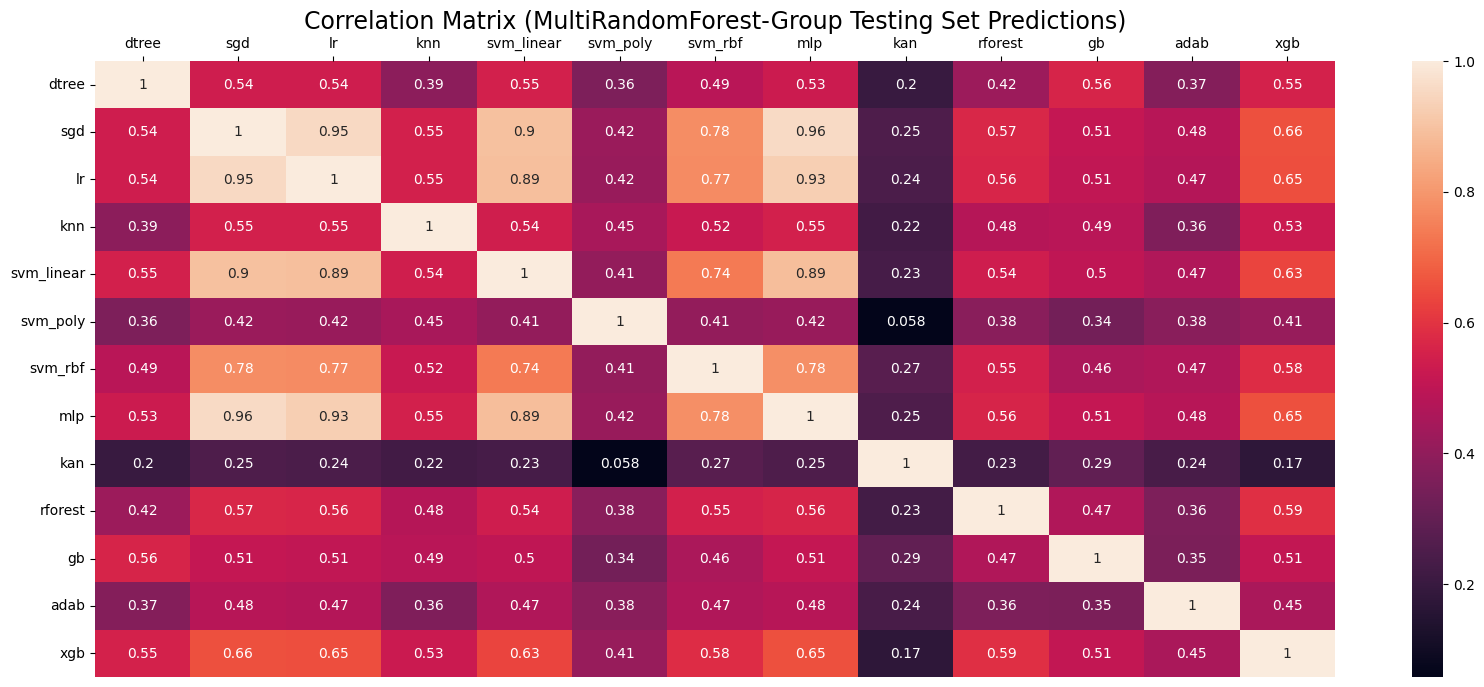

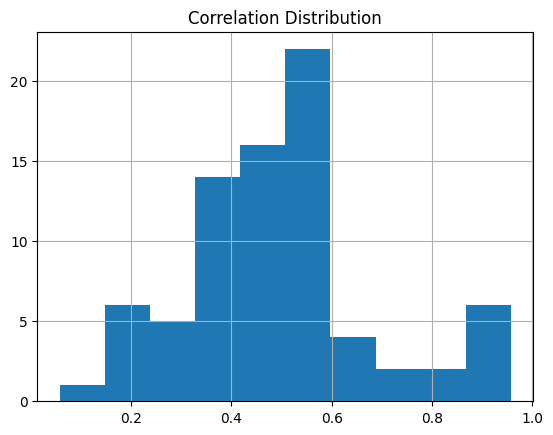

Testing correlation distribution:
count    78.000000
mean      0.496184
std       0.186537
min       0.058102
25%       0.385847
50%       0.487535
75%       0.558155
max       0.957177
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0078
NMSE: 0.0731
MAE: 0.2348
NMAE: 0.6036
aRRMSE: 0.4753
aCC: 0.9337


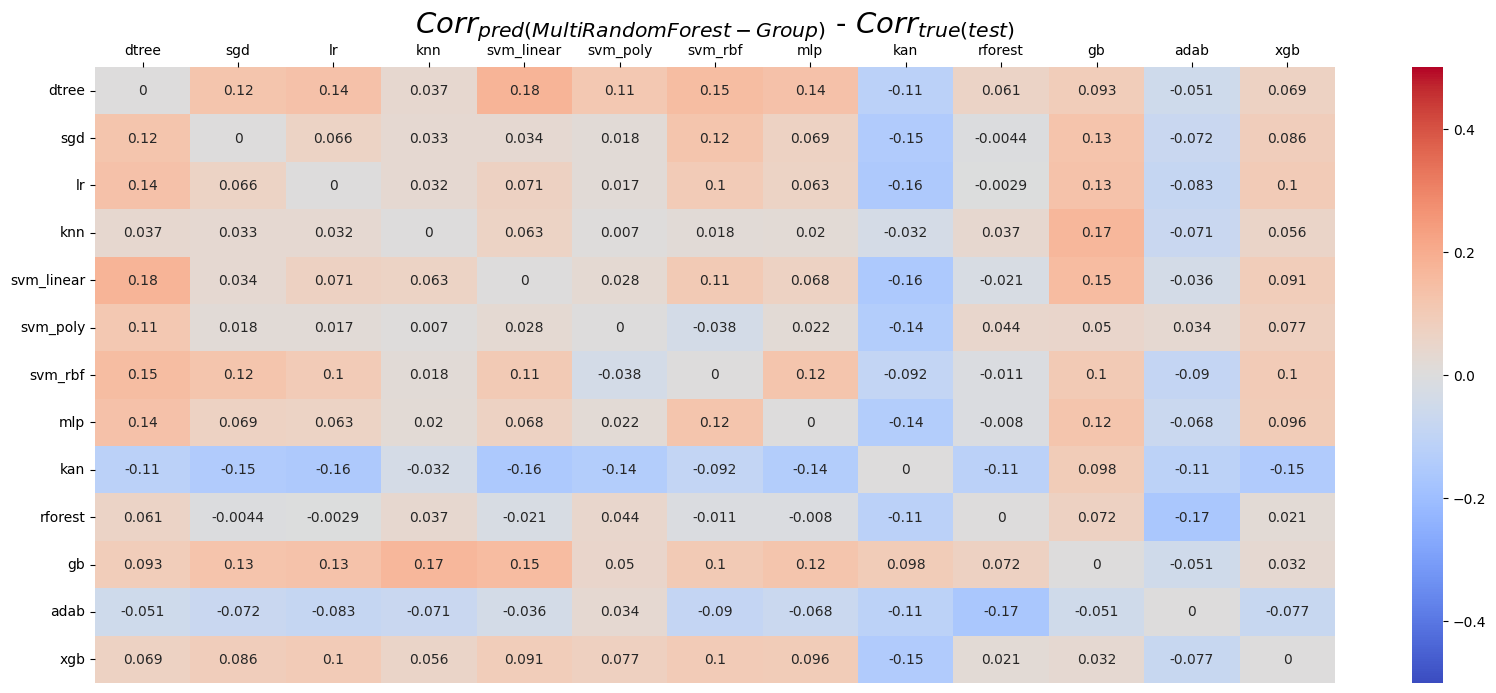

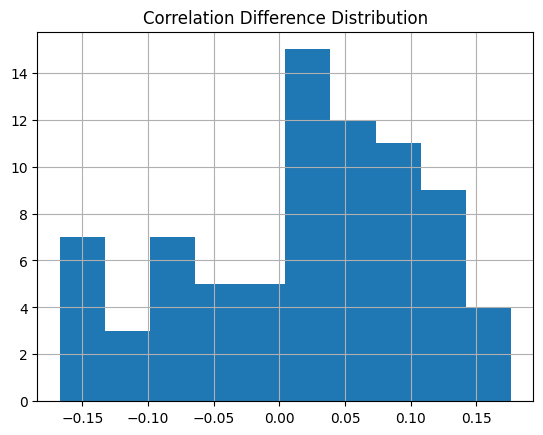

[['kan'], ['rforest'], ['mlp', 'sgd', 'svm_linear', 'svm_rbf', 'lr'], ['mlp', 'sgd', 'lr', 'xgb'], ['svm_poly'], ['knn'], ['adab'], ['dtree'], ['gb']]


In [50]:
metrics_df.loc['MRT(g)',:] = assr_performance(mrfg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(mrfg, Xa_test, ya_test, min_score=MIN_SCORE, name="MultiRandomForest-Group")

diff_metrics.loc['MRT(g)',:] = results['results']

groups['mrfg_assessor'] = results['groups']
print(groups['mrfg_assessor']['test'])

In [51]:
#keys = list(groups.keys())
#OBJV = len(groups['true_assessor_test'])
#for i in range(len(keys)):
#    if('test' in keys[i] and keys[i] != 'true_assessor_test'):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & true_assessor_test({OBJV}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups['true_assessor_test']):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

## Análises

In [52]:
results_df = metrics_df.copy()
results_df = results_df.reset_index()

results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.066898  0.850712  0.213765  0.894977  0.922341   
1        ST         sgd  0.035082   0.77635  0.152606  0.847468  0.881107   
2        ST          lr   0.01001  0.747281  0.079003  0.832759  0.864454   
3        ST         knn  0.030168  0.813318  0.142208  0.865585  0.901842   
4        ST  svm_linear  0.025841  0.795178  0.129468  0.860798  0.891728   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.114392  0.979948  0.286264  0.966827  0.989923   
87    RC(g)     rforest   0.03503   0.86078  0.153779  0.919298  0.927783   
88    RC(g)          gb  0.085998  1.034548  0.249029  0.987738  1.017127   
89    RC(g)        adab  0.001467  0.900536  0.025751  0.874819  0.948966   
90    RC(g)         xgb  0.035615  0.816694   0.15232  0.871327  0.903711   

         aCC  
0   0.412323  
1   0.476309  
2   0.511993  
3   0.438895  
4   0.452745  
..       ...  
86  0.189614  
87  0.378154  
88  0.221452  
89  0.346271  
90  0.438742  

[91 rows x 8 columns]

In [53]:
diff_results = diff_metrics.reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff.csv')
diff_results

Assessor       MSE       MAE      NMSE      NMAE    aRRMSE       aCC
0        ST  0.008357  0.075489  0.247314  0.615568  0.488187  0.917692
1       MRT  0.042634  0.185016  1.308456  1.555901  1.117812  0.926861
2    MRT(g)   0.00783  0.073143  0.234763  0.603577  0.475267  0.933738
3     M-SVR  0.035598  0.161212  1.083956  1.356016  1.016842  0.886117
4  M-SVR(g)  0.027492  0.139197  0.826647  1.155149  0.889914   0.88943
5        RC  0.011668   0.08431  0.350662  0.680314  0.569228  0.895119
6     RC(g)  0.007355   0.06954  0.224323  0.584069  0.462905  0.931202

In [54]:
win_table = pd.DataFrame(index=results_df['Assessor'].unique(), columns=results_df.drop(columns=['Assessor', 'Model']).columns)

for mt in ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE']:
    assr_wins = results_df.loc[results_df.groupby("Model")[mt].idxmin(), ["Model", "Assessor", mt]]
    win_table[mt] = assr_wins['Assessor'].value_counts()

assr_wins = results_df.loc[results_df.groupby("Model")['aCC'].idxmin(), ["Model", "Assessor", 'aCC']]
win_table['aCC'] = assr_wins['Assessor'].value_counts()

win_table = win_table.fillna(0)
win_table.to_csv(f'data/{DIR}/win_table.csv')
win_table

MSE  MAE  NMSE  NMAE  aRRMSE   aCC
ST        1.0  1.0     2     2     1.0   1.0
MRT       6.0  6.0     4     4     6.0   1.0
MRT(g)    3.0  3.0     2     2     3.0   0.0
M-SVR     1.0  1.0     1     1     1.0   0.0
M-SVR(g)  0.0  0.0     2     2     0.0  10.0
RC        1.0  1.0     1     1     1.0   1.0
RC(g)     1.0  1.0     1     1     1.0   0.0

In [55]:
class_palette = sns.color_palette()[:7]

In [56]:
summary = results_df.drop(columns=['Model']).groupby(['Assessor']).agg(['mean', 'std'])
summary.to_csv(f'data/{DIR}/results.csv')
summary

MSE                 MAE                NMSE            \
              mean       std      mean       std      mean       std   
Assessor                                                               
M-SVR     0.045158  0.029195  1.498788  1.470598  0.157084  0.057754   
M-SVR(g)  0.049158  0.030624  1.598539  1.393343  0.162235  0.054984   
MRT       0.038651  0.031768  0.825655  0.079419  0.148066  0.070965   
MRT(g)    0.039116  0.032337   0.83779  0.091211  0.148451  0.071846   
RC        0.040044  0.032711  0.867842  0.079148  0.150113  0.072013   
RC(g)     0.039153  0.032267  0.843058  0.085170  0.148821  0.071576   
ST        0.039265  0.032223  0.848904  0.082382  0.148837  0.071472   

              NMAE              aRRMSE                 aCC            
              mean       std      mean       std      mean       std  
Assessor                                                              
M-SVR     1.055833  0.391674  1.153185  0.427821  0.329389  0.052769  
M-SVR(g)  1.093316  0.376754  1.201647  0.409226  0.300437  0.049628  
MRT       0.883028  0.045010  0.907719  0.042915  0.429388  0.101665  
MRT(g)    0.885202  0.049176  0.914099  0.048963     0.411  0.107600  
RC        0.897831  0.044787  0.930718  0.041725  0.371081  0.099431  
RC(g)     0.888361  0.045932  0.917148  0.045337  0.406239  0.101703  
ST        0.889404  0.046246  0.920399  0.043792  0.396082  0.095953

In [57]:
results_df_c = results_df.copy()

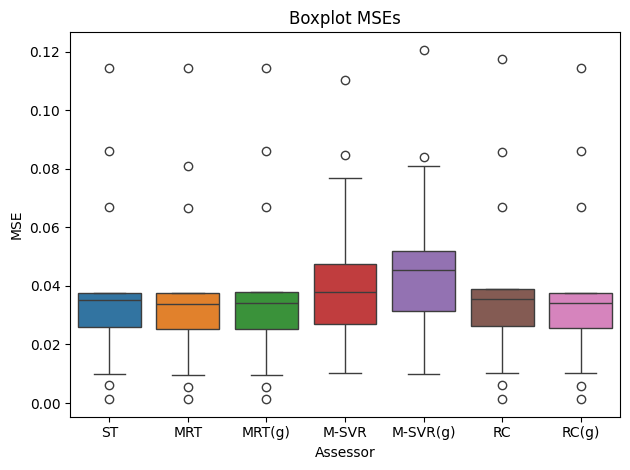

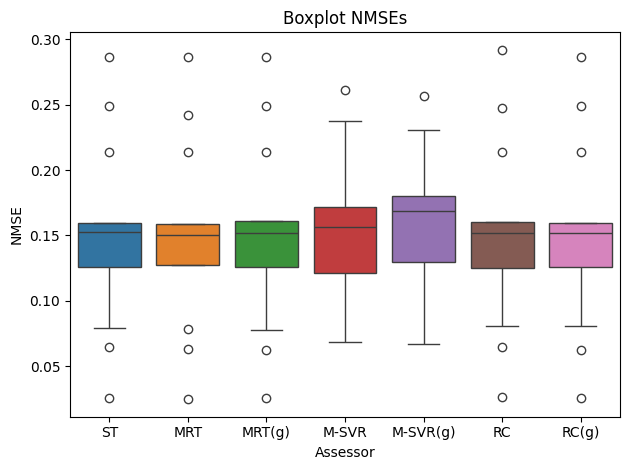

C:\Users\pedro\AppData\Local\Temp\ipykernel_16472\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


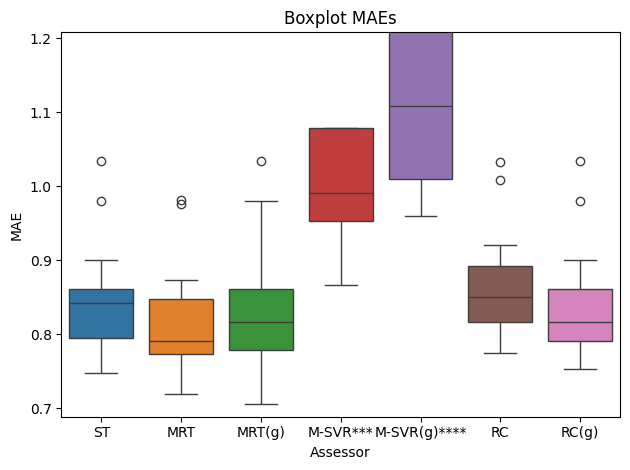

C:\Users\pedro\AppData\Local\Temp\ipykernel_16472\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


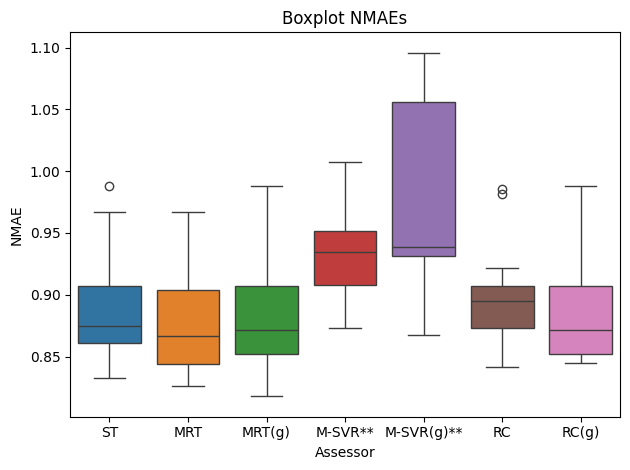

C:\Users\pedro\AppData\Local\Temp\ipykernel_16472\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


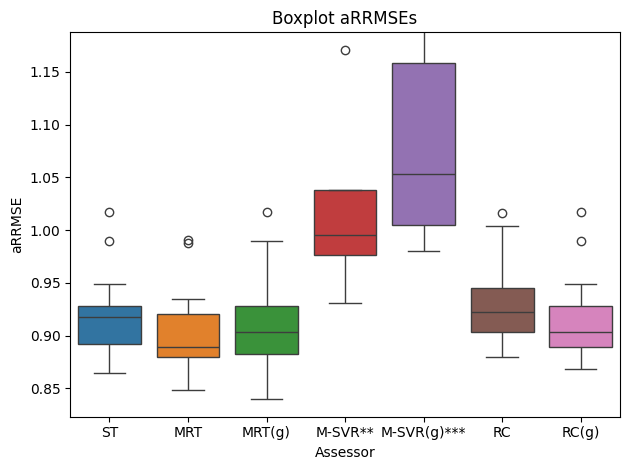

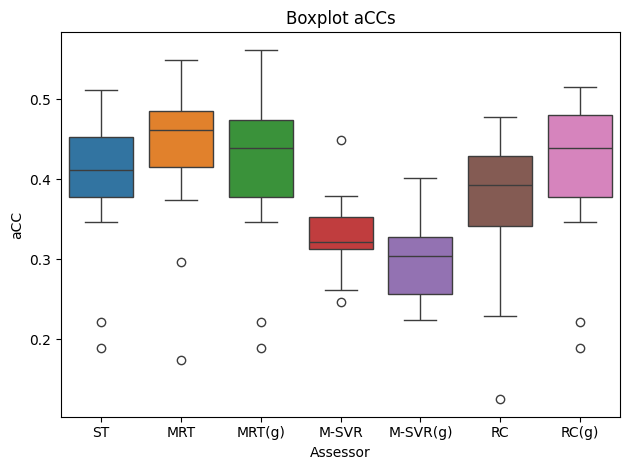

In [58]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

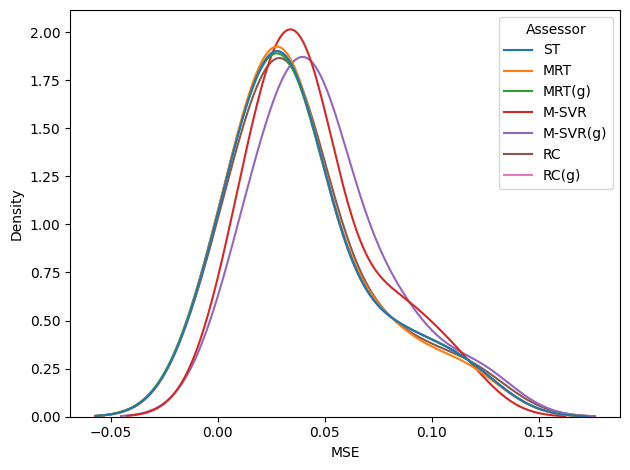

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


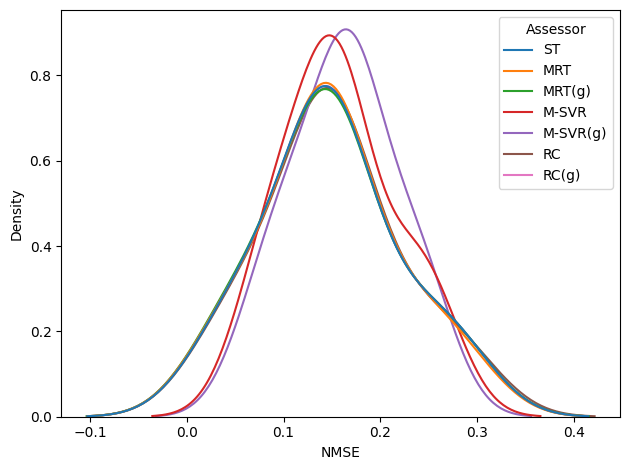

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_16472\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


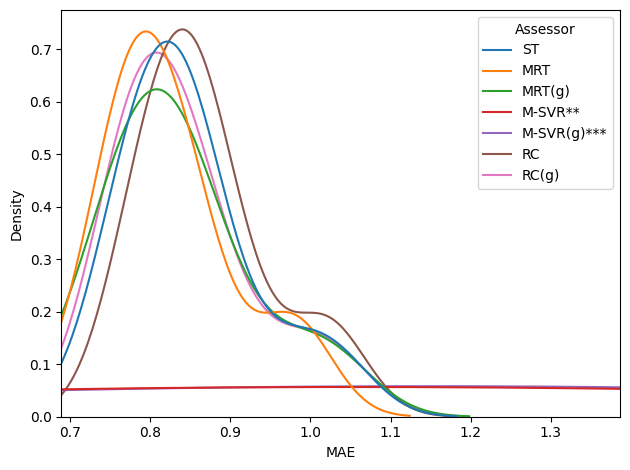

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_16472\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


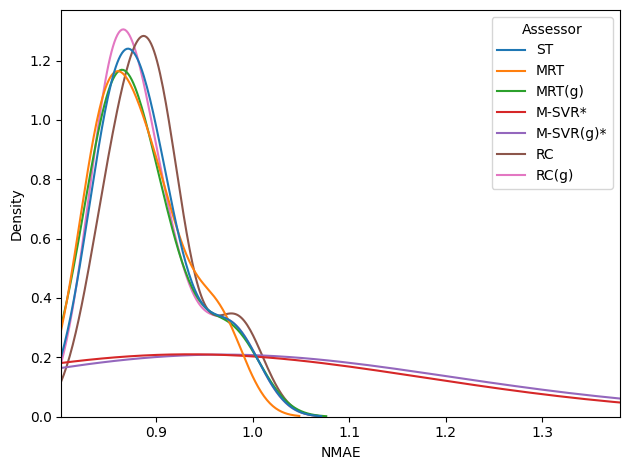

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_16472\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


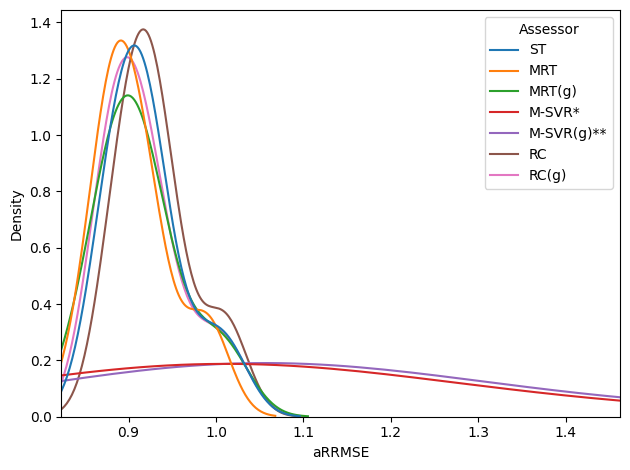

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


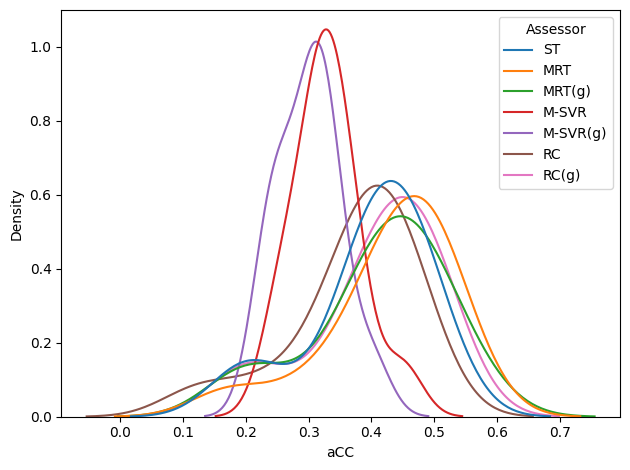

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [59]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.5).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.5).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.xlim(temp[mt].min()-0.017,temp.loc[temp[mt]<1.5,mt].max()+0.017)
    imgplt = sns.kdeplot(temp, x=mt, hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/kde_{mt.lower()}.eps', format='eps', dpi=300)

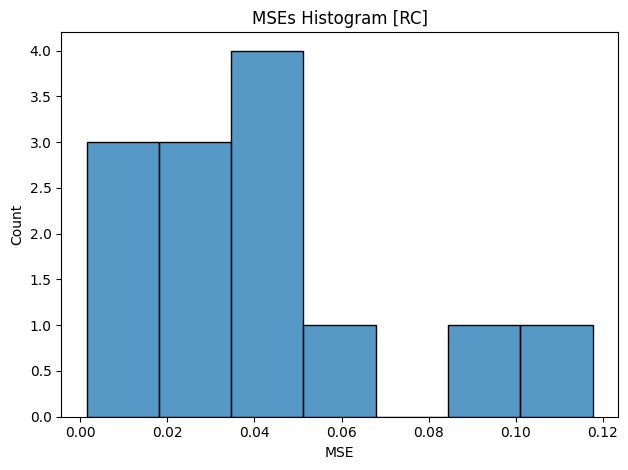

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


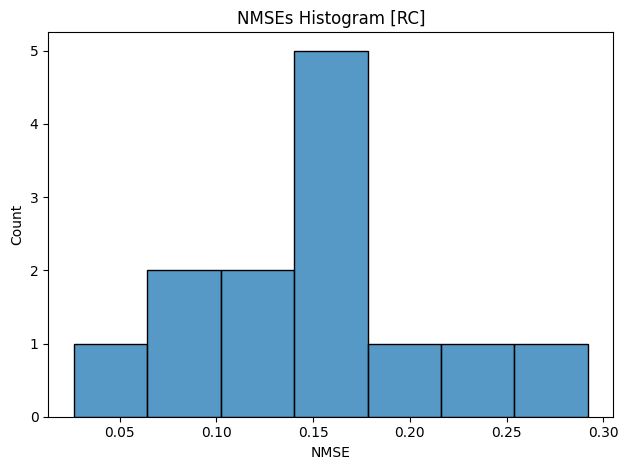

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


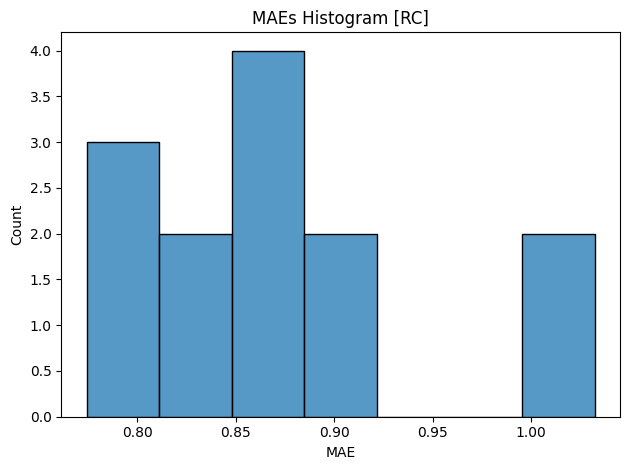

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


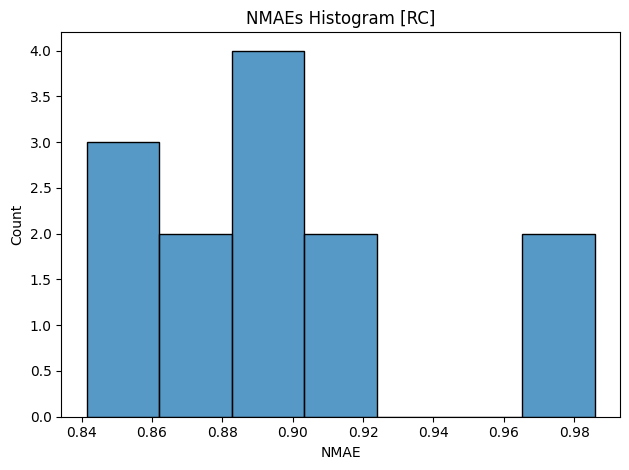

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


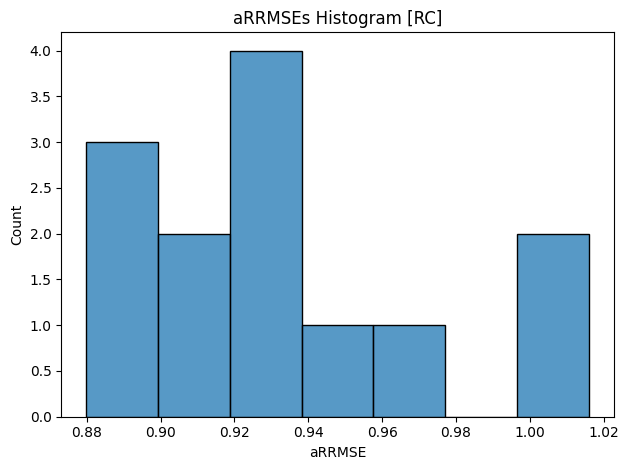

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


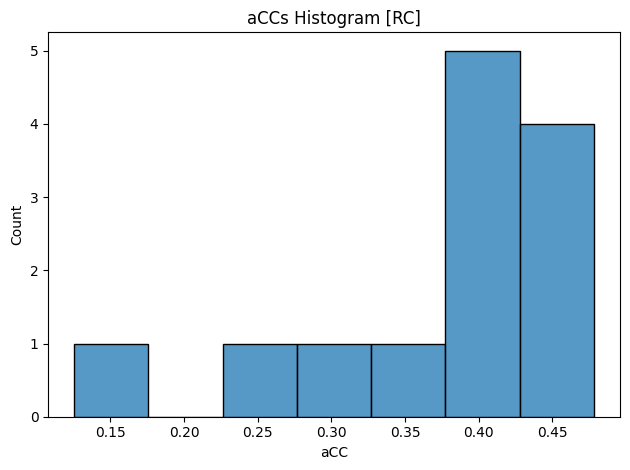

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


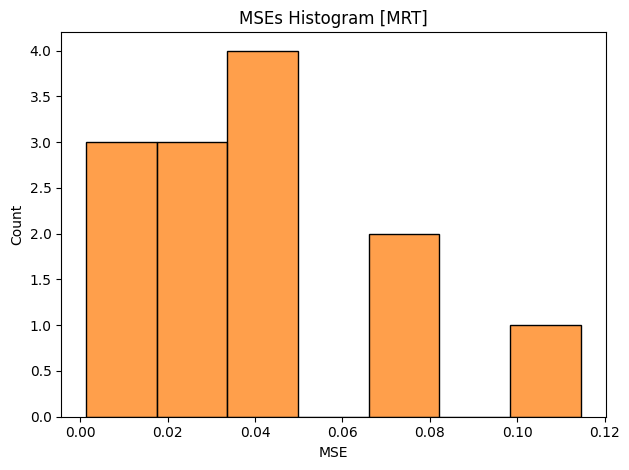

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


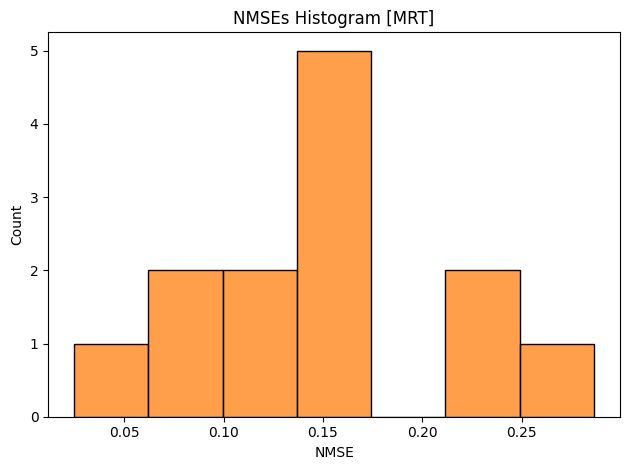

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


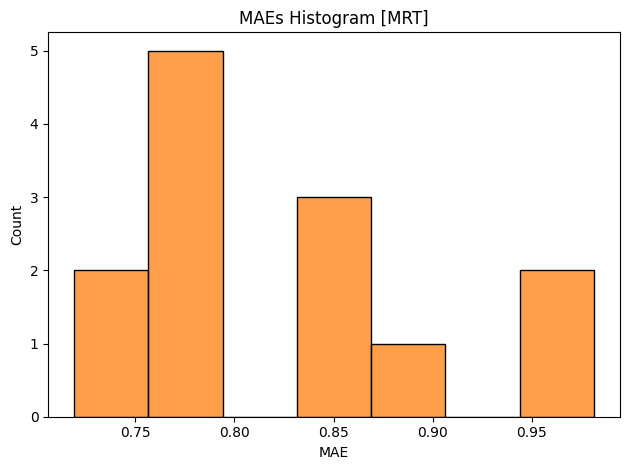

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


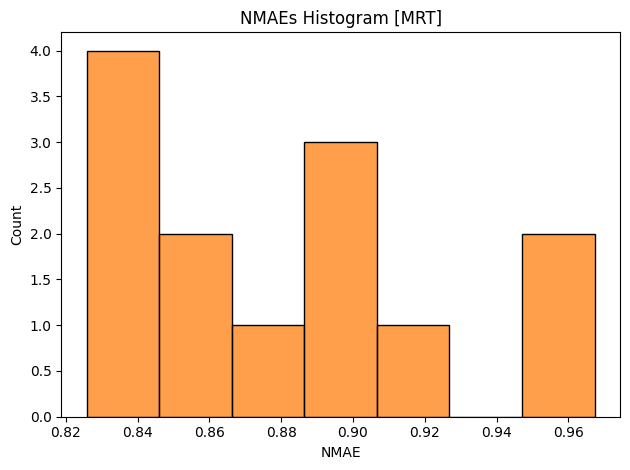

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


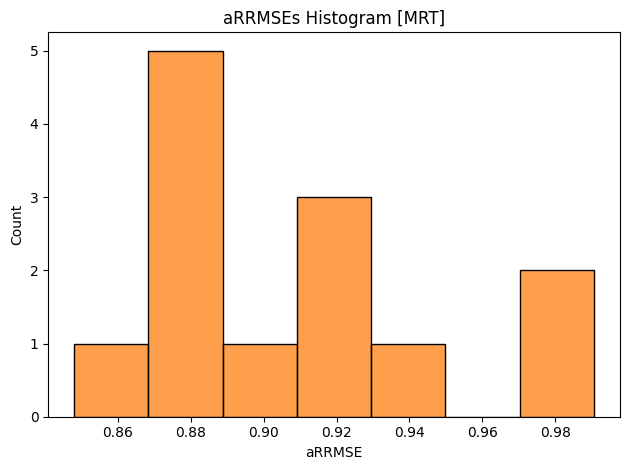

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


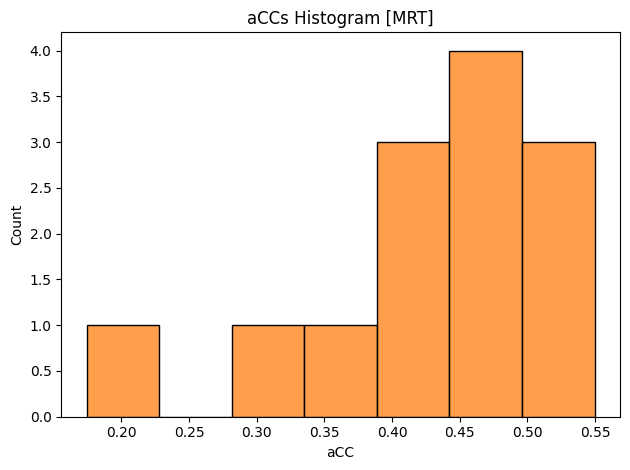

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


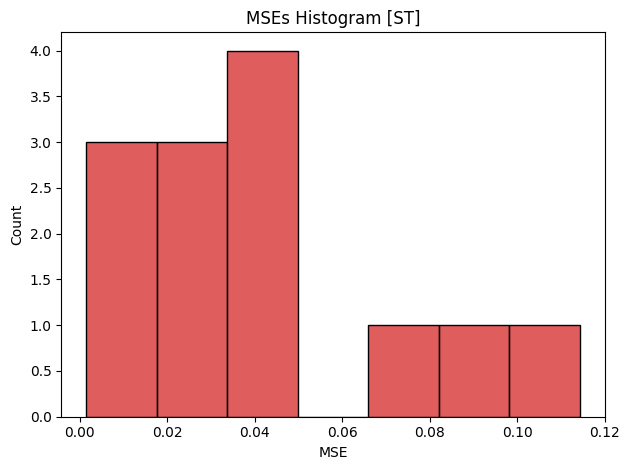

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


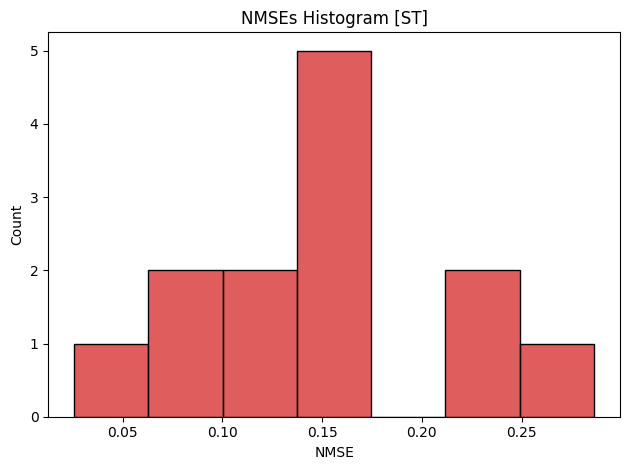

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


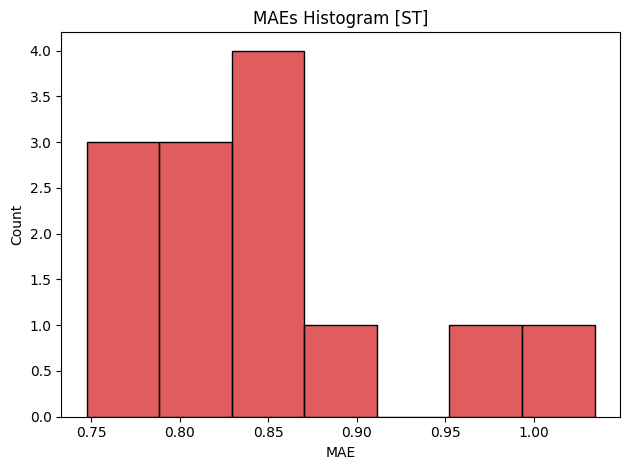

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


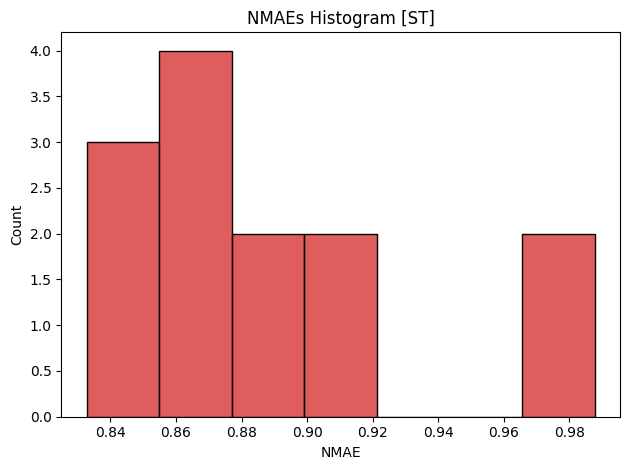

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


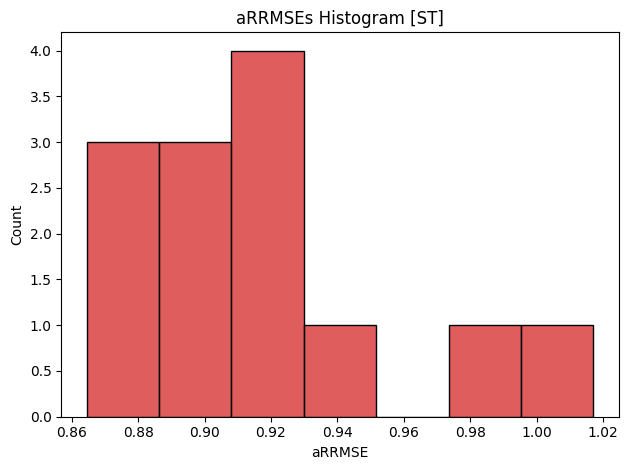

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


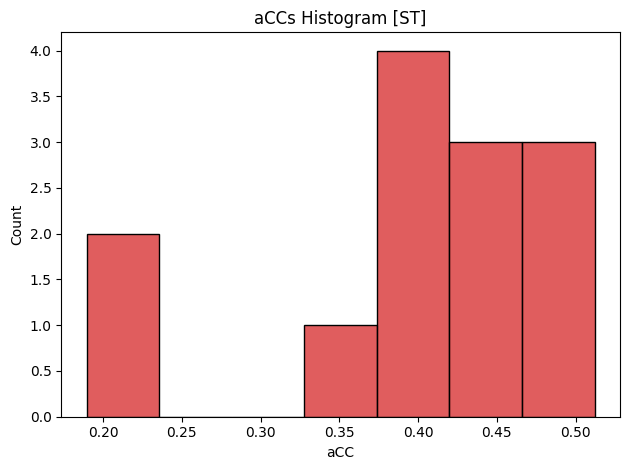

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


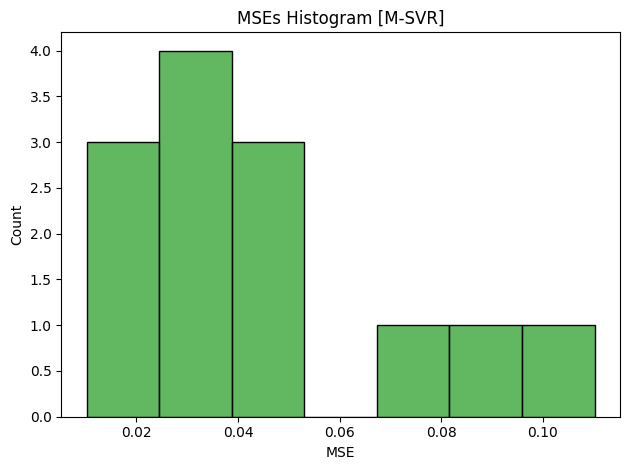

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


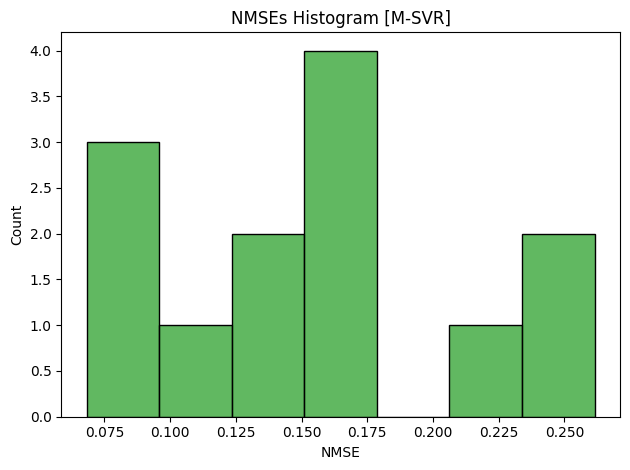

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


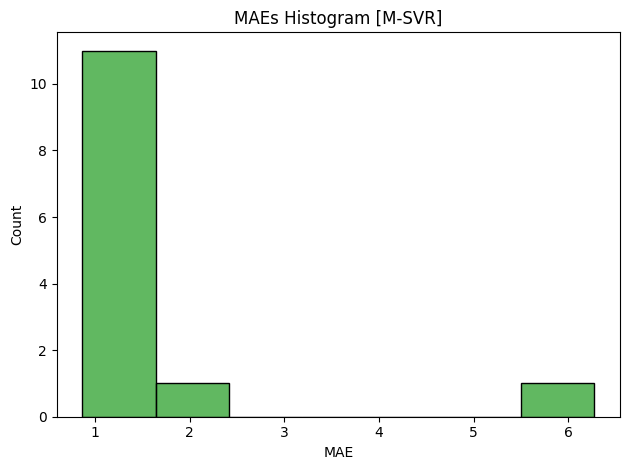

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


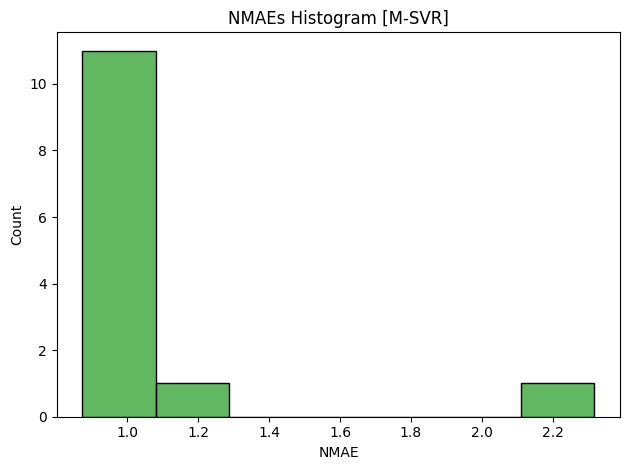

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


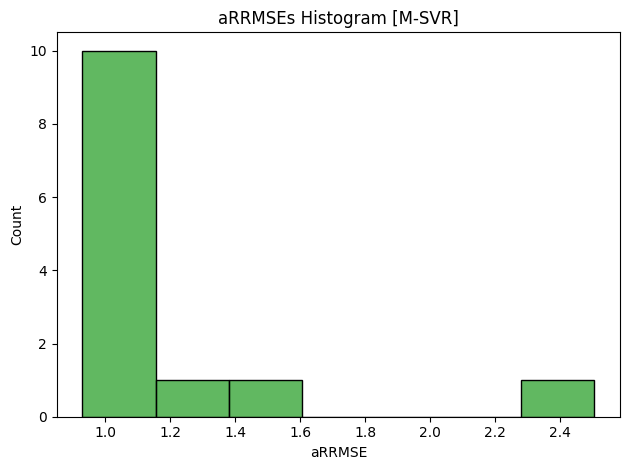

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


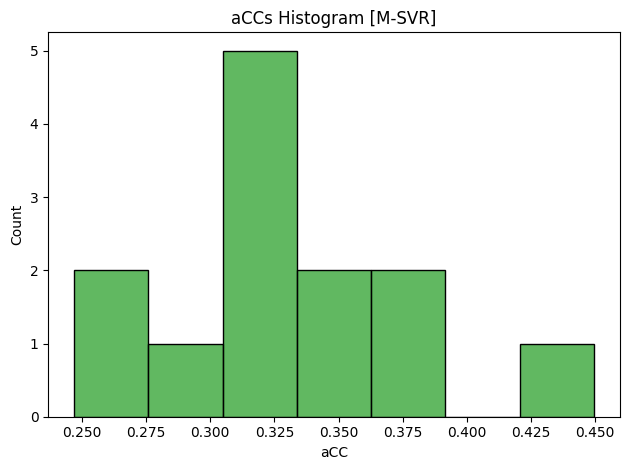

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


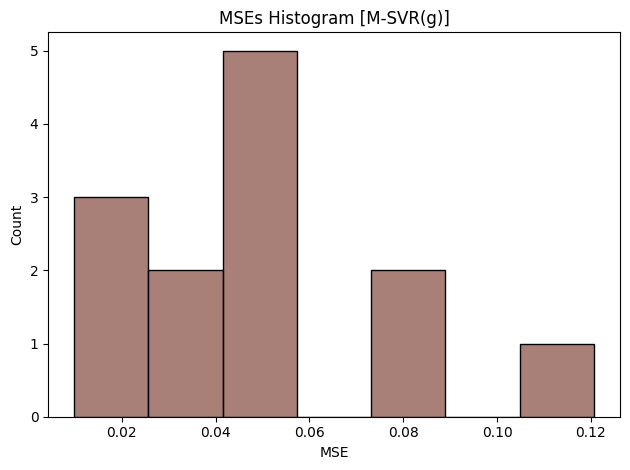

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


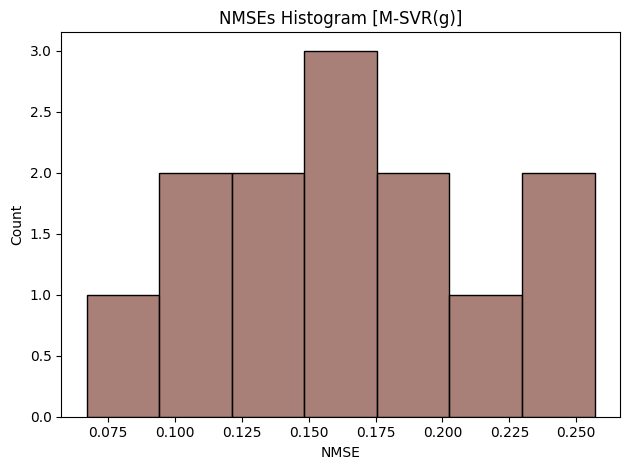

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


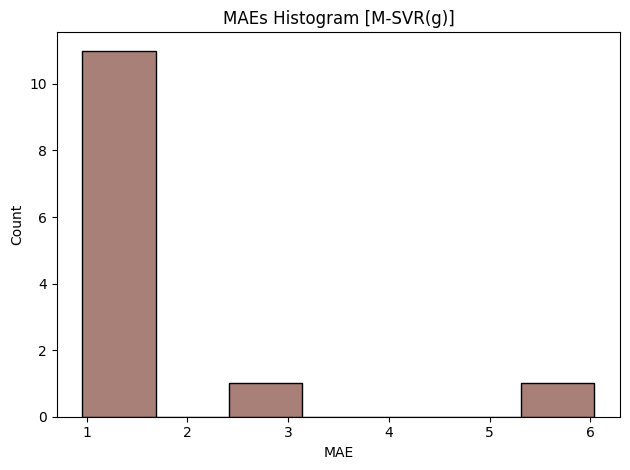

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


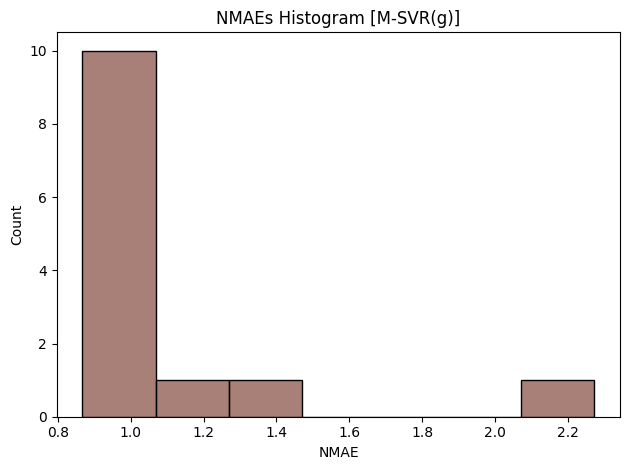

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


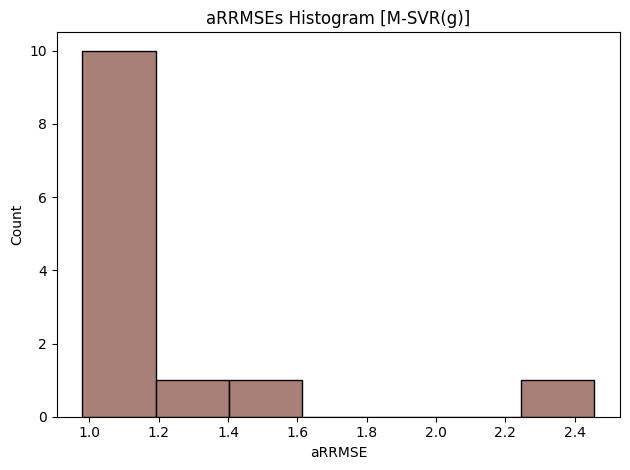

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


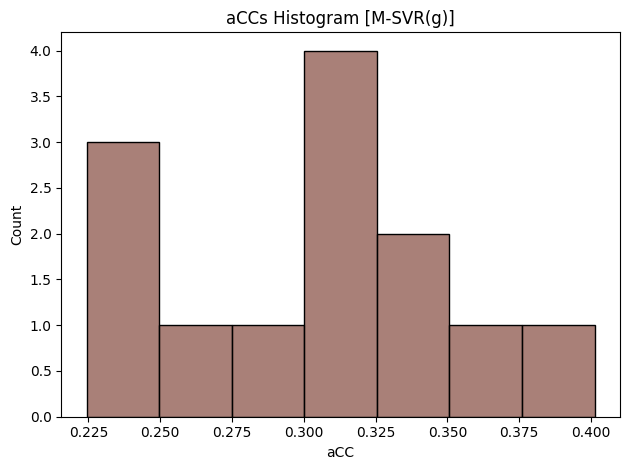

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


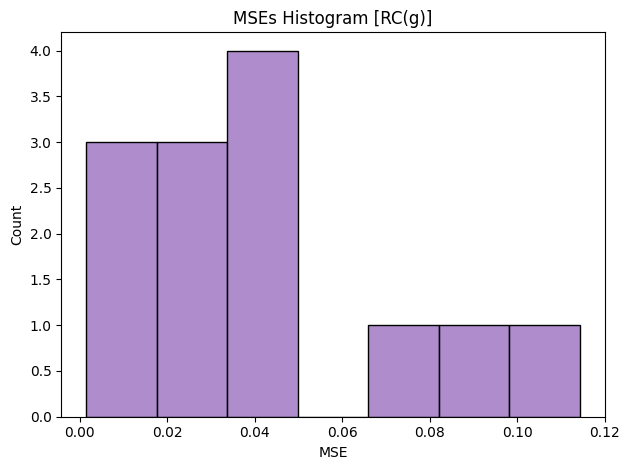

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


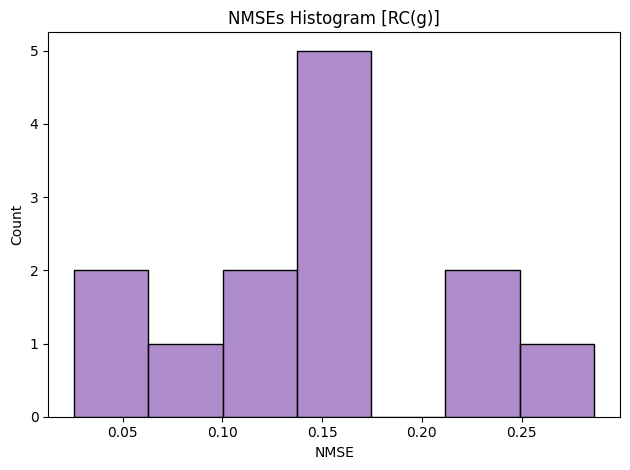

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


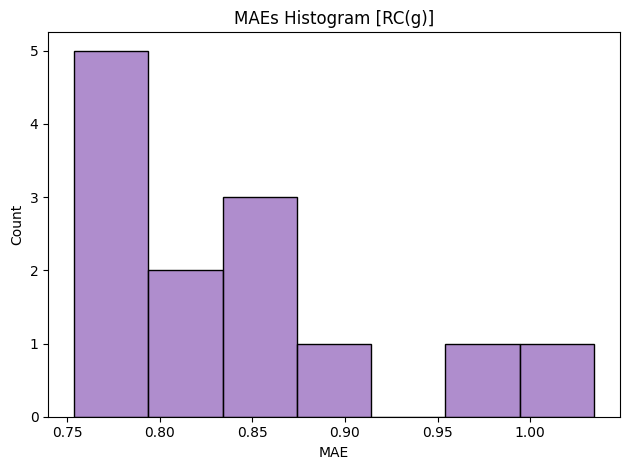

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


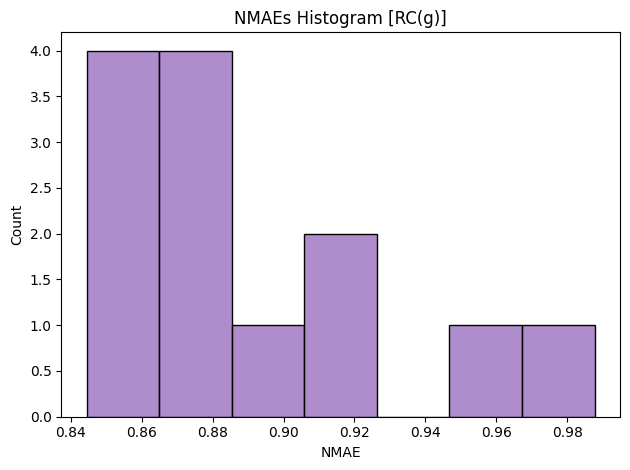

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


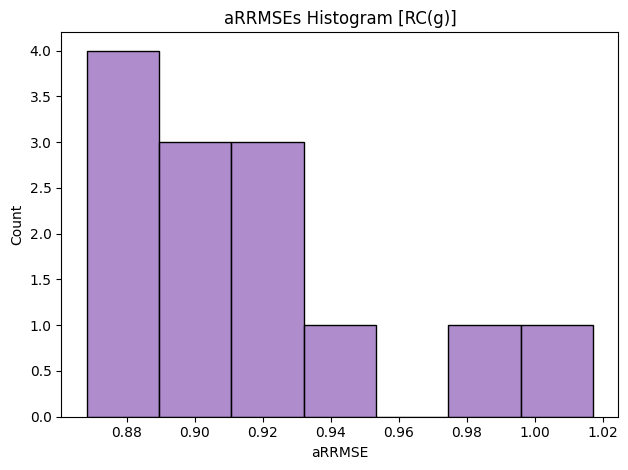

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


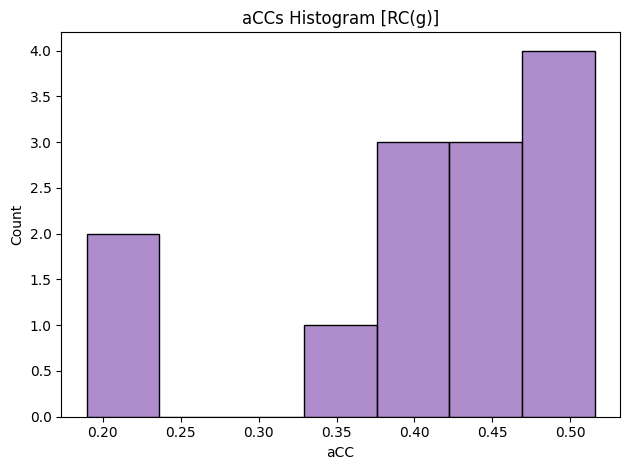

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


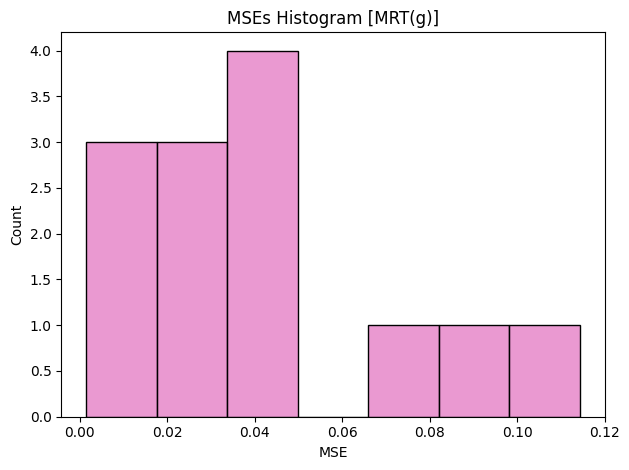

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


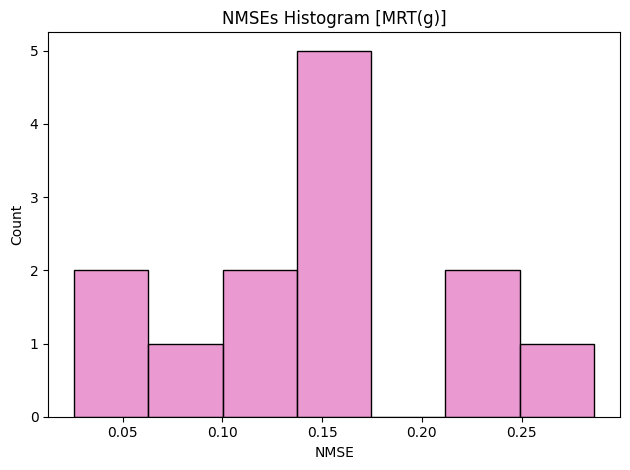

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


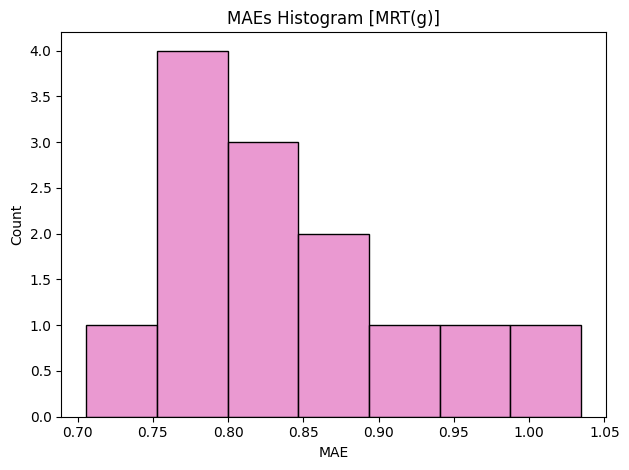

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


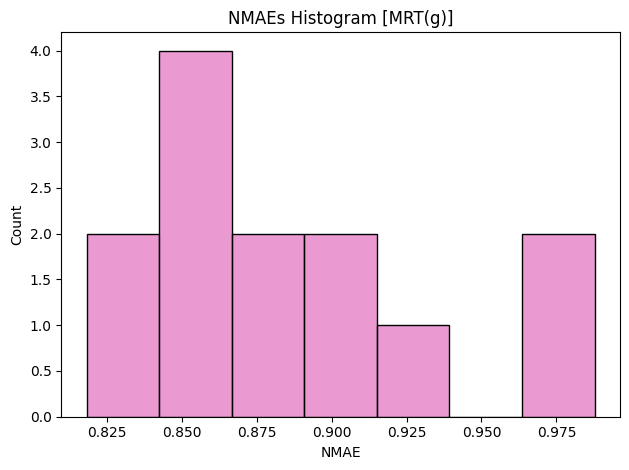

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


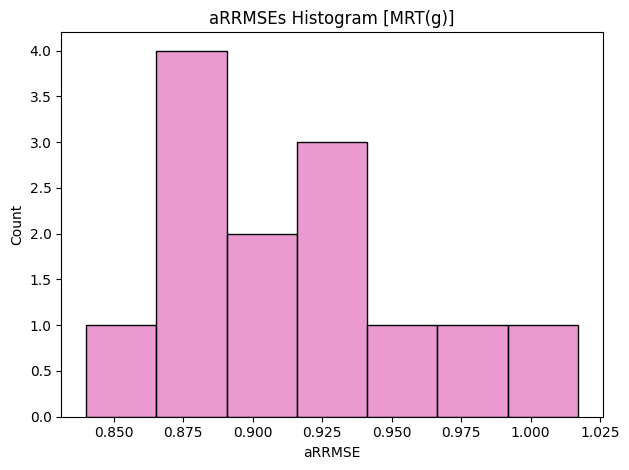

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


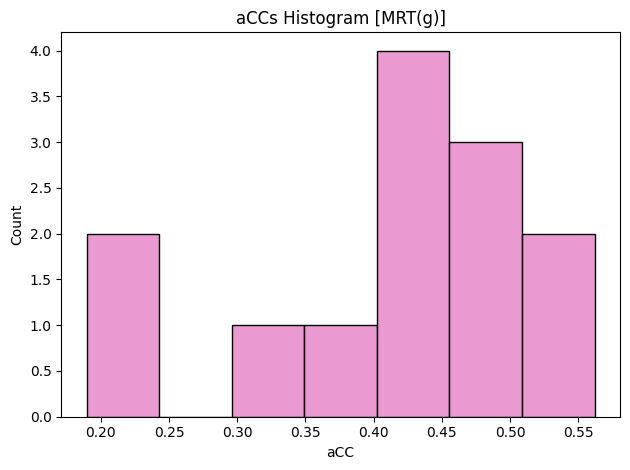

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [60]:
dicio = {'RC': {'color': class_palette[0], 'code': 'RC'},
         'MRT': {'color': class_palette[1], 'code': 'MRT'},
         'ST': {'color': class_palette[3], 'code': 'ST'},
         'M-SVR': {'color': class_palette[2], 'code': 'MSVR'},
         'M-SVR(g)': {'color': class_palette[-2], 'code': 'MSVRG'},
         'RC(g)': {'color': class_palette[-3], 'code': 'RCG'},
         'MRT(g)': {'color': class_palette[-1], 'code': 'MRTG'}}

for a in dicio.keys():
    for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
        plt.title(f'{mt}s Histogram [{a}]')
        imgplt = sns.histplot(results_df.loc[results_df['Assessor']==a,['Assessor','Model',mt]], x=mt, bins=7, color=dicio[a]['color'])
        plt.tight_layout()
        plt.show(imgplt)
        imgplt.figure.savefig(f'data/{DIR}/imgs/hg_{dicio[a]["code"]}_{mt.lower()}.eps', format='eps', dpi=300)

In [61]:
results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.066898  0.850712  0.213765  0.894977  0.922341   
1        ST         sgd  0.035082   0.77635  0.152606  0.847468  0.881107   
2        ST          lr   0.01001  0.747281  0.079003  0.832759  0.864454   
3        ST         knn  0.030168  0.813318  0.142208  0.865585  0.901842   
4        ST  svm_linear  0.025841  0.795178  0.129468  0.860798  0.891728   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.114392  0.979948  0.286264  0.966827  0.989923   
87    RC(g)     rforest   0.03503   0.86078  0.153779  0.919298  0.927783   
88    RC(g)          gb  0.085998  1.034548  0.249029  0.987738  1.017127   
89    RC(g)        adab  0.001467  0.900536  0.025751  0.874819  0.948966   
90    RC(g)         xgb  0.035615  0.816694   0.15232  0.871327  0.903711   

         aCC  
0   0.412323  
1   0.476309  
2   0.511993  
3   0.438895  
4   0.452745  
..       ...  
86  0.189614  
87  0.378154  
88  0.221452  
89  0.346271  
90  0.438742  

[91 rows x 8 columns]

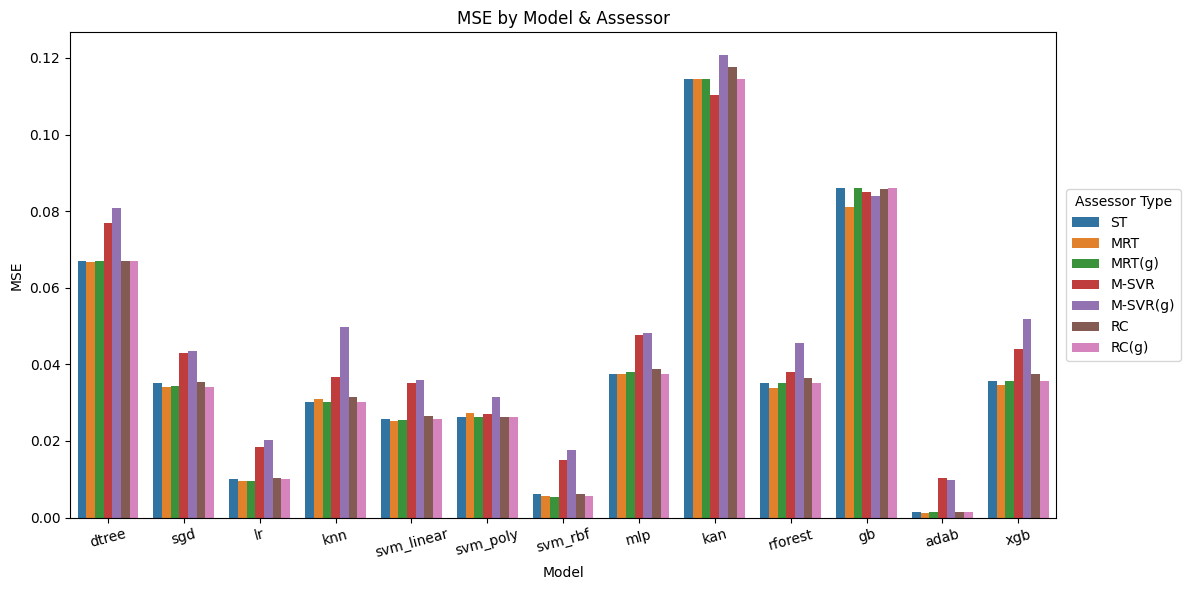

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


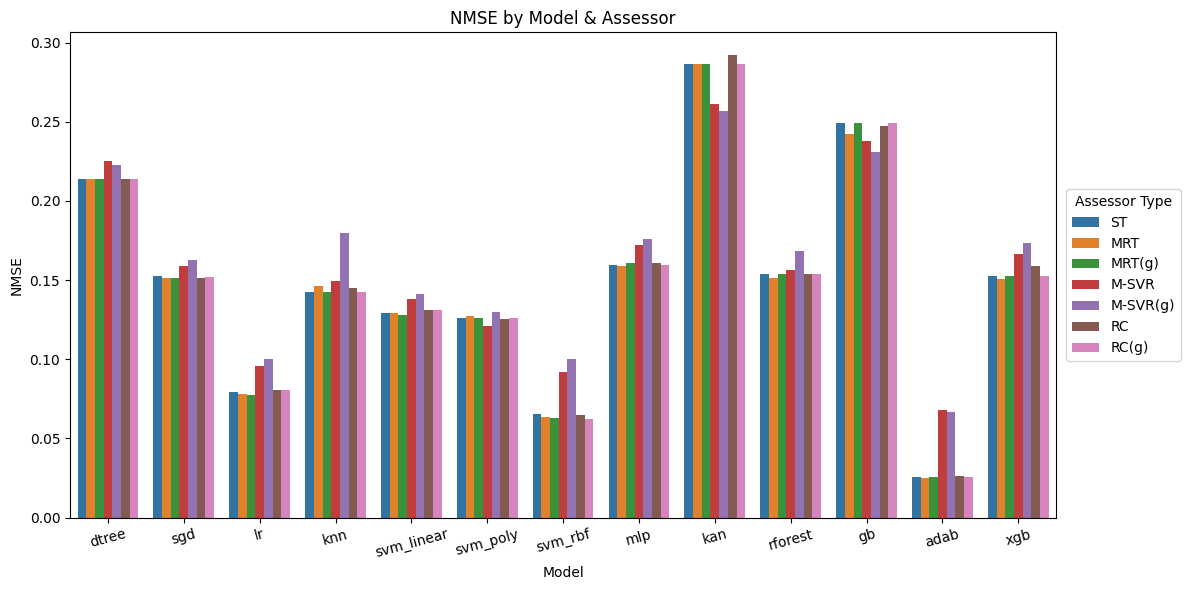

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


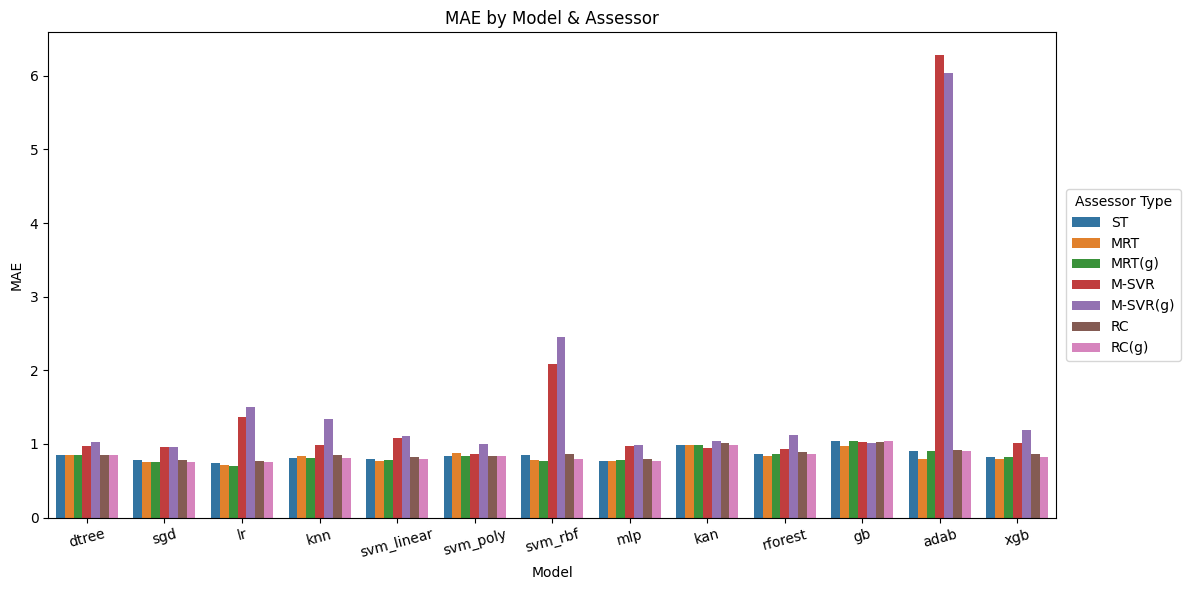

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


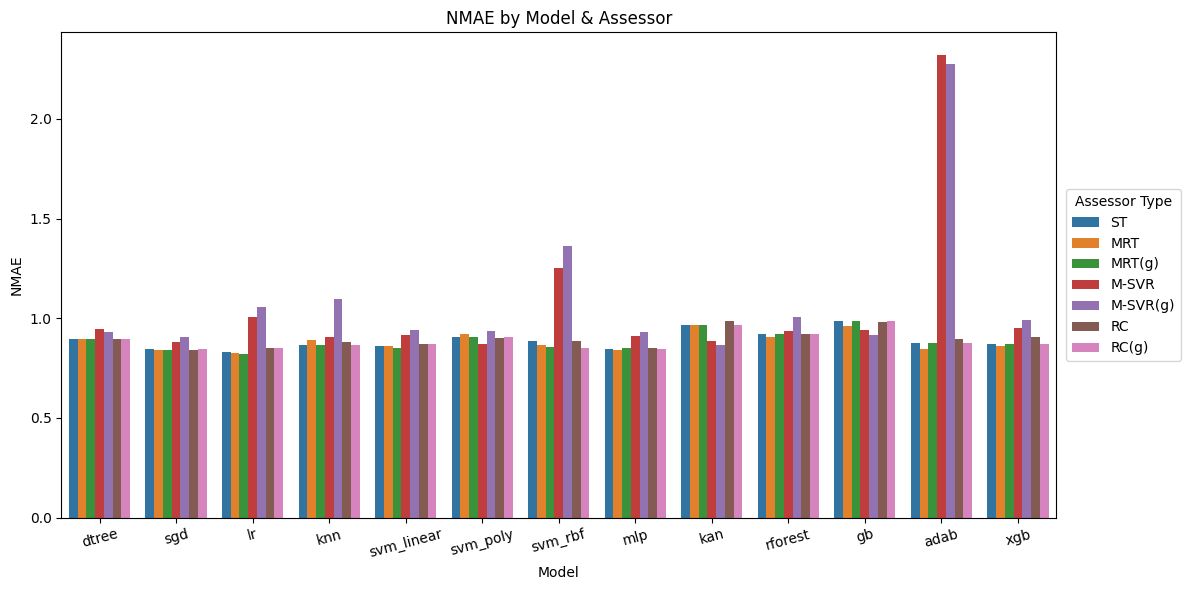

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


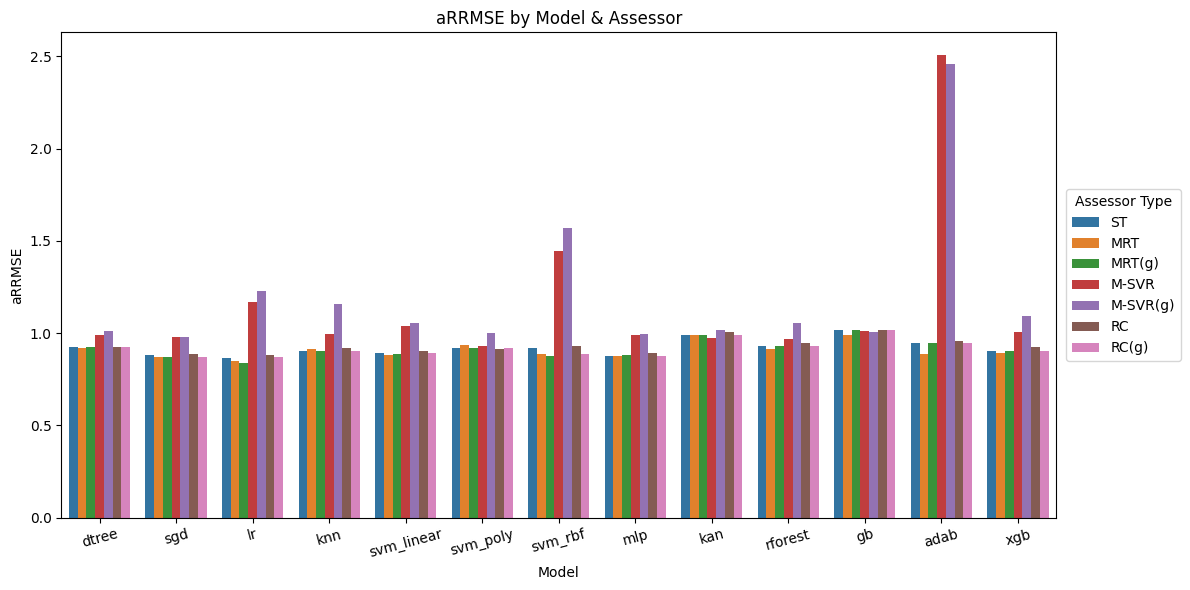

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


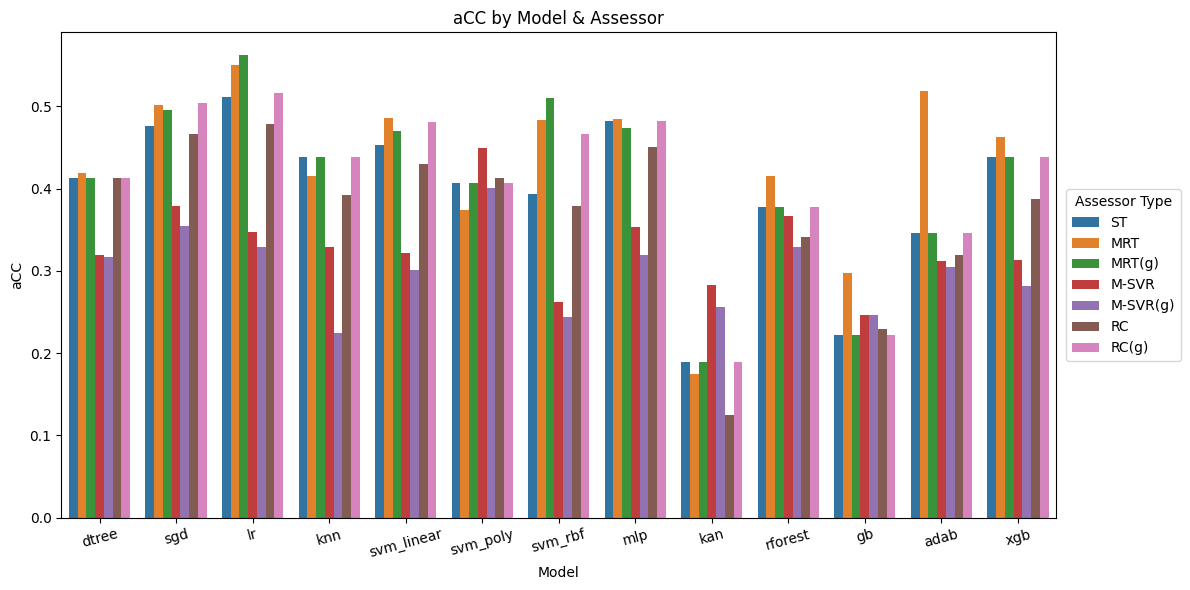

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [62]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

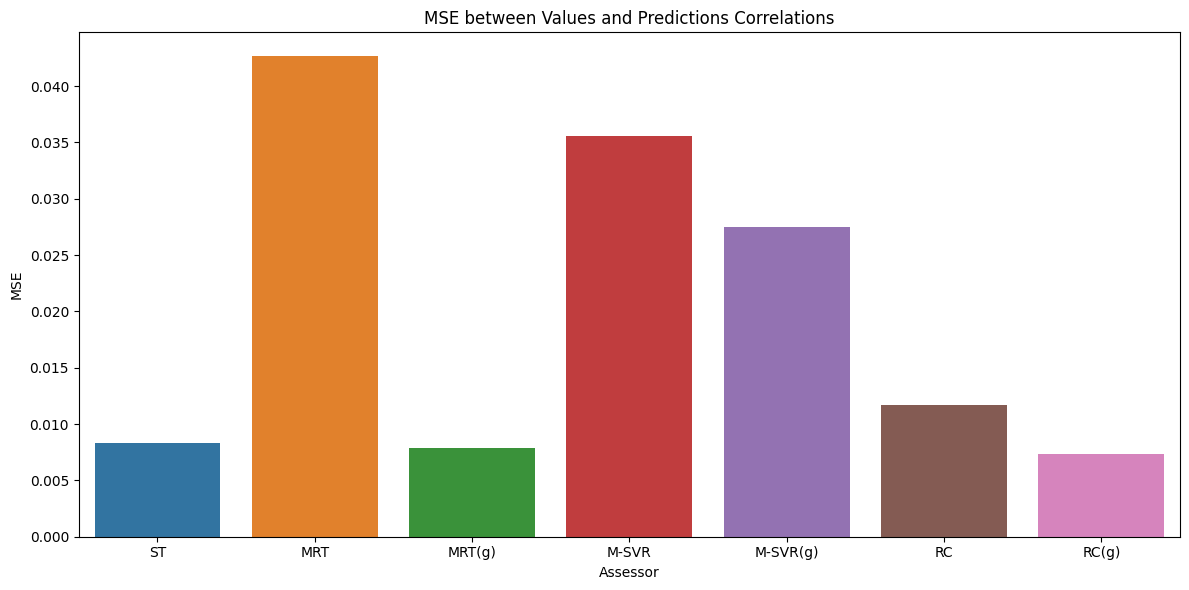

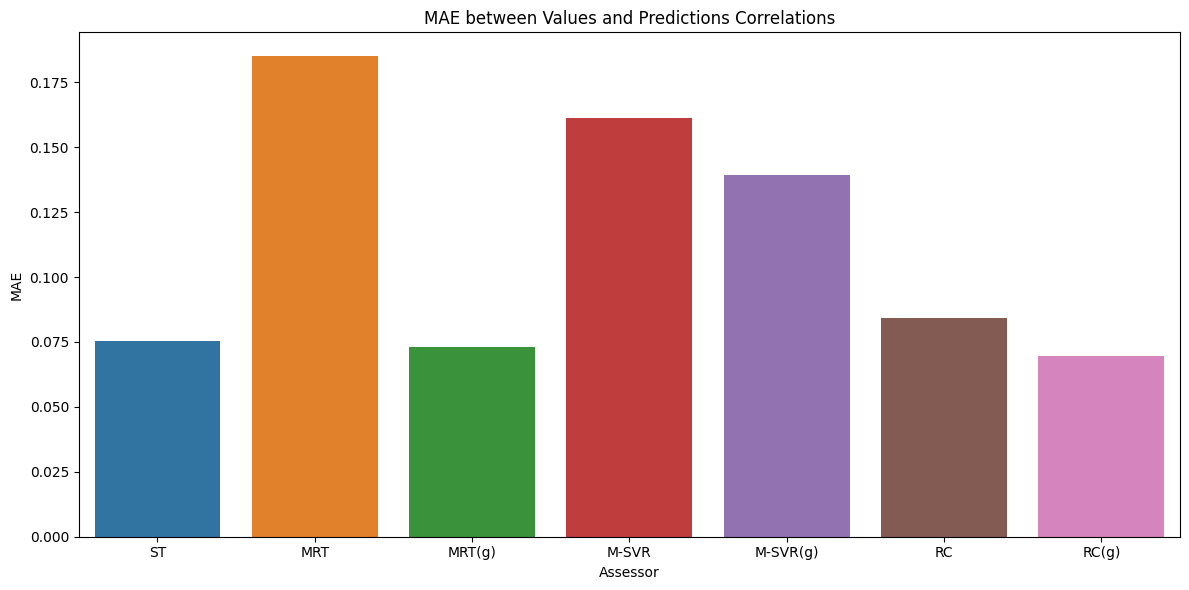

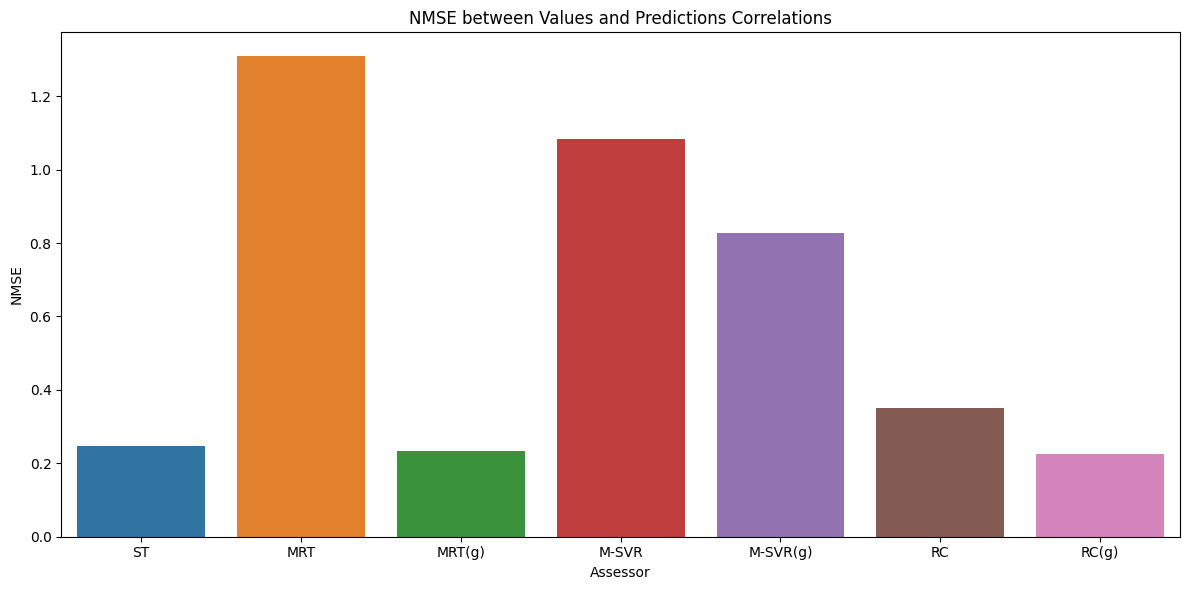

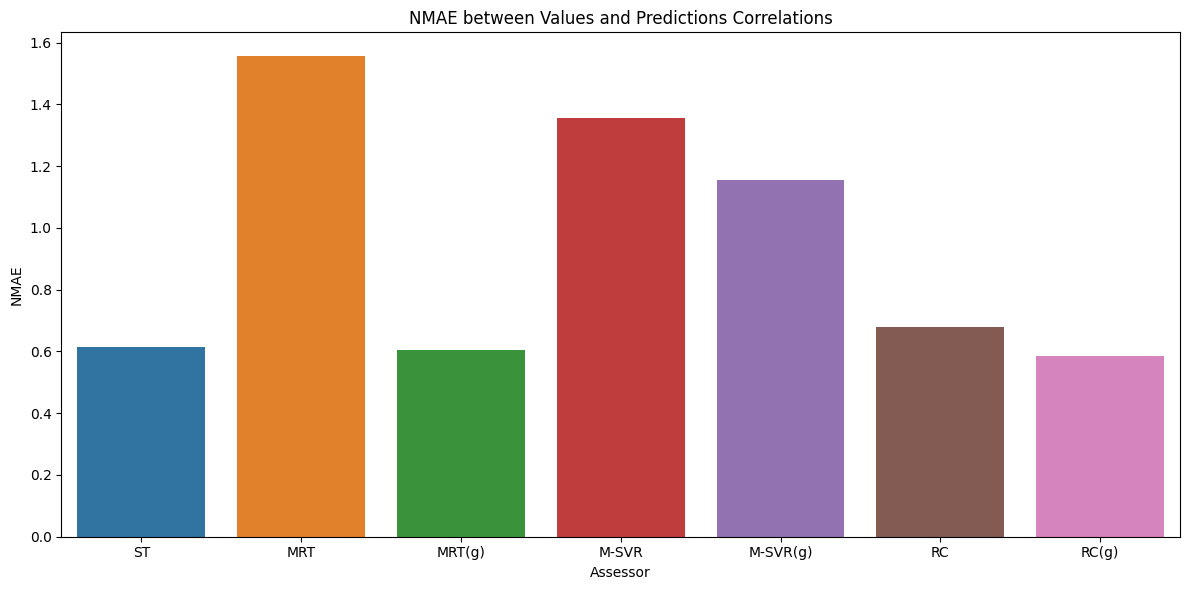

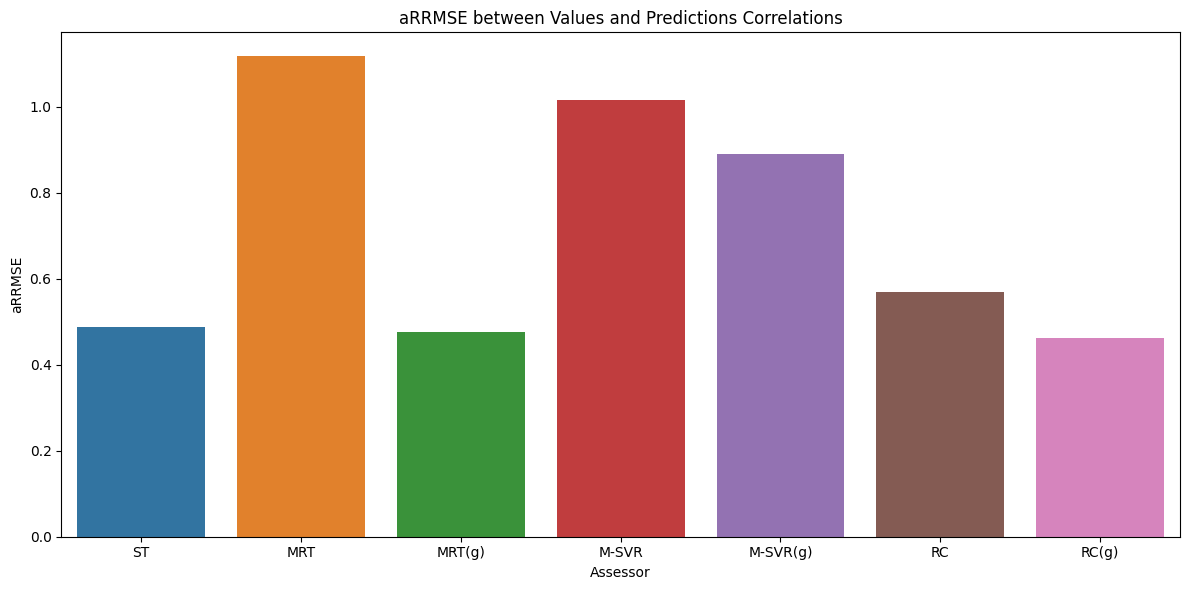

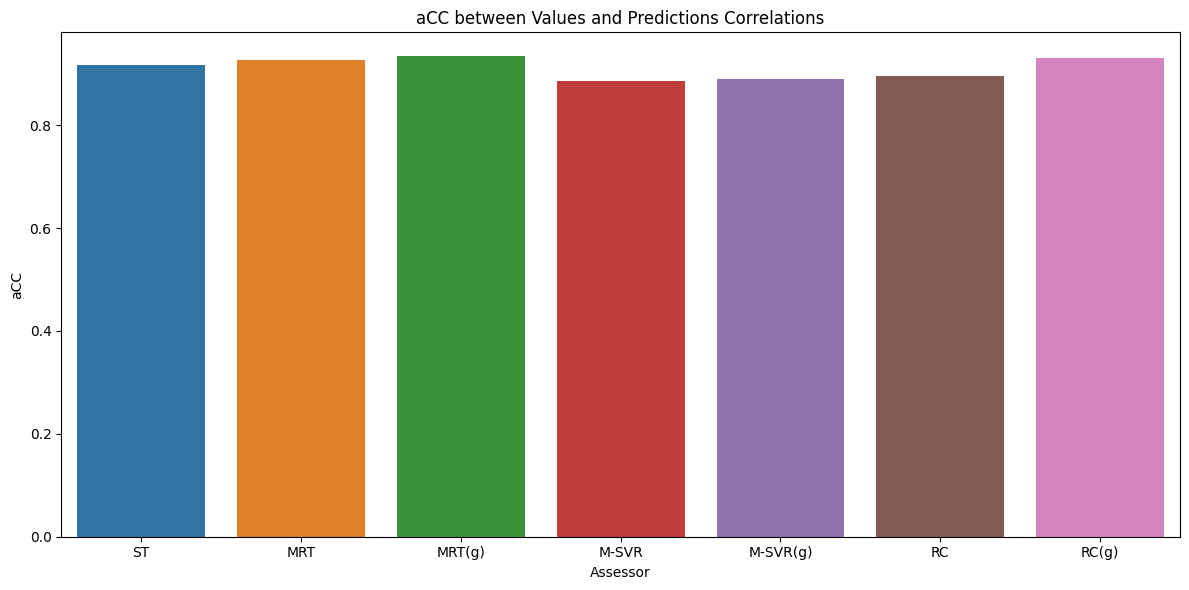

In [63]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)